In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px

In [2]:
df_final = pd.read_csv('cleaned_data.csv')
df_final.head(10)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,City_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time,order_hour,order_period,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,Sunny,high,...,24,INDO,Saturday,3,19,1,15.0,11.0,Morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,Stormy,jam,...,33,BANG,Friday,3,25,0,5.0,19.0,Evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,Sandstorms,low,...,26,BANG,Saturday,3,19,1,15.0,8.0,Morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,Sunny,medium,...,21,COIMB,Tuesday,4,5,0,10.0,18.0,Evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,Cloudy,high,...,30,CHEN,Saturday,3,26,1,15.0,13.0,Afternoon,6.210138
5,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,Cloudy,jam,...,26,HYD,Friday,3,11,0,10.0,21.0,Night,4.610365
6,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,Fog,jam,...,40,RANCHI,Friday,3,4,0,15.0,19.0,Evening,16.600361
7,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,Cloudy,medium,...,32,MYS,Monday,3,14,0,5.0,17.0,Evening,20.205253
8,HYDRES05DEL02,22.0,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,Stormy,jam,...,34,HYD,Sunday,3,20,1,10.0,20.0,Evening,19.975520
9,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,Fog,jam,...,46,DEH,Saturday,2,12,1,15.0,21.0,Night,10.280582


In [3]:
df_final.shape

(45502, 26)

In [4]:
df_final.isna().sum()

,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,4029
restaurant_longitude,3765
delivery_latitude,3630
delivery_longitude,3630
order_date,0
weather,525
traffic,510


In [5]:
missing_rows = (
    df_final.isnull().any(axis=1).sum()
)
missing_rows

np.int64(7584)

In [6]:
missing_rows/df_final.shape[0]

np.float64(0.16667399235198452)

In [7]:
df_final.dtypes

,0
rider_id,object
age,float64
ratings,float64
restaurant_latitude,float64
restaurant_longitude,float64
delivery_latitude,float64
delivery_longitude,float64
order_date,object
weather,object
traffic,object


In [8]:
num_cols = df_final.columns[[1,2,3,4,5,6,16,22,25]].tolist()

In [9]:
cat_cols = [col for col in df_final.columns.tolist() if col not in num_cols]

In [10]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time',
 'distance']

In [11]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'City_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_hour',
 'order_period']

In [12]:
# statistical summary of numerical column
df_final[num_cols].describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,time_taken,pickup_time,distance
count,43648.000000,43594.000000,41473.000000,41737.000000,41872.000000,41872.000000,45502.000000,43862.000000,41473.000000
mean,29.555008,4.635287,18.898979,76.920513,18.977356,76.985325,26.297591,9.989399,9.719256
std,5.761482,0.313827,5.460570,3.503334,5.469056,3.503260,9.386419,4.087516,5.602950
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,10.000000,5.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,19.000000,5.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,26.000000,10.000000,9.193021
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,32.000000,15.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,54.000000,15.000000,20.969489


In [13]:
# Summary of categorical Columns

(
    df_final
    .assign(**{
        col: df_final[col].astype("object")
        for col in cat_cols
    })
    .describe(include='object')
    .T
)

,count,unique,top,freq
rider_id,45502,1320,PUNERES01DEL01,67
order_date,45502,44,2022-03-15,1190
weather,44977,6,Fog,7654
traffic,44992,4,low,15477
vehicle_condition,45502,4,2,15034
type_of_order,45502,4,snack,11512
type_of_vehicle,45502,4,motorcycle,26427
multiple_deliveries,44509.0,4.0,1.0,28109.0
festival,45274,2,No,44380
city_type,44304,3,metropolitian,34029


Analysis


In [43]:
def numerical_analysis(dataframe,column_name, cat_col=None, bins='auto'):
  # Create the figure
  fig = plt.figure(figsize =(15,10))
  # generate the layout
  grid = GridSpec(nrows = 2, ncols=2, figure = fig)
  # set subplots
  ax1 = fig.add_subplot(grid[0,0])
  ax2 = fig.add_subplot(grid[0,1])
  ax3 = fig.add_subplot(grid[1,:])
  # plot the kdeplot
  sns.kdeplot(data = dataframe, x = column_name,hue = cat_col,ax=ax1)
  sns.boxplot(data = dataframe, x = column_name,hue = cat_col,ax=ax2)
  sns.histplot(data = dataframe, x = column_name,hue = cat_col,ax=ax3,bins=bins)
  plt.tight_layout()
  plt.show()

def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
  fig, (ax1,ax2) = plt.subplots(2,2,figsize=(15,7.5))
  # plot the barplot
  sns.barplot(data = dataframe, x = cat_column_1, y = num_column, ax = ax1[0])
  sns.boxplot(data = dataframe, x = cat_column_1, y = num_column, ax = ax1[1])
  sns.violinplot(data = dataframe, x = cat_column_1, y = num_column, ax = ax2[0])
  sns.stripplot(data = dataframe, x = cat_column_1, y=num_column, ax = ax2[1])
  plt.tight_layout()
  plt.show()

def categorical_analysis(dataframe, column_name):
  display(
      pd.DataFrame({
          'Count': (
              dataframe[column_name]
              .value_counts()),
          'Percentage': (
              dataframe[column_name]
              .value_counts(normalize=True)
              .mul(100)
              .round(2)
              .astype('str')
              .add('%')
          )


      })
  )

  print('*' * 50)
  # get unique categories
  unique_categories = dataframe[column_name].unique().tolist()
  number_of_categories = dataframe[column_name].nunique()
  print(f'The unique categories in {column_name} column are {unique_categories}')
  print('*' * 50)
  print(f'The number of categories in {column_name} coumn are {number_of_categories}')
  sns.countplot(data = dataframe, x = column_name)
  plt.xticks(rotation = 45)
  plt.show()


def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 7.5))

    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column, hue=cat_column_2, ax=ax1[0])

    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column, hue=cat_column_2, gap=0.1, ax=ax1[1])

    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1,
                   y=num_column, hue=cat_column_2, gap=0.1, ax=ax2[0])

    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column, hue=cat_column_2, dodge=True, ax=ax2[1])

    plt.tight_layout()
    plt.show()


def chi_2_test(dataframe, col1, col2, alpha=0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )

    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)

    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )

    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)

    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)

    if p_val <= alpha:
        print("Reject the null hypothesis. The data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis. The data is normally distributed.", end="\n\n")







In [ ]:
# Column wise analysis

In [15]:
 df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'City_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time', 'order_hour',
       'order_period', 'distance'],
      dtype='object')

In [ ]:
# Target


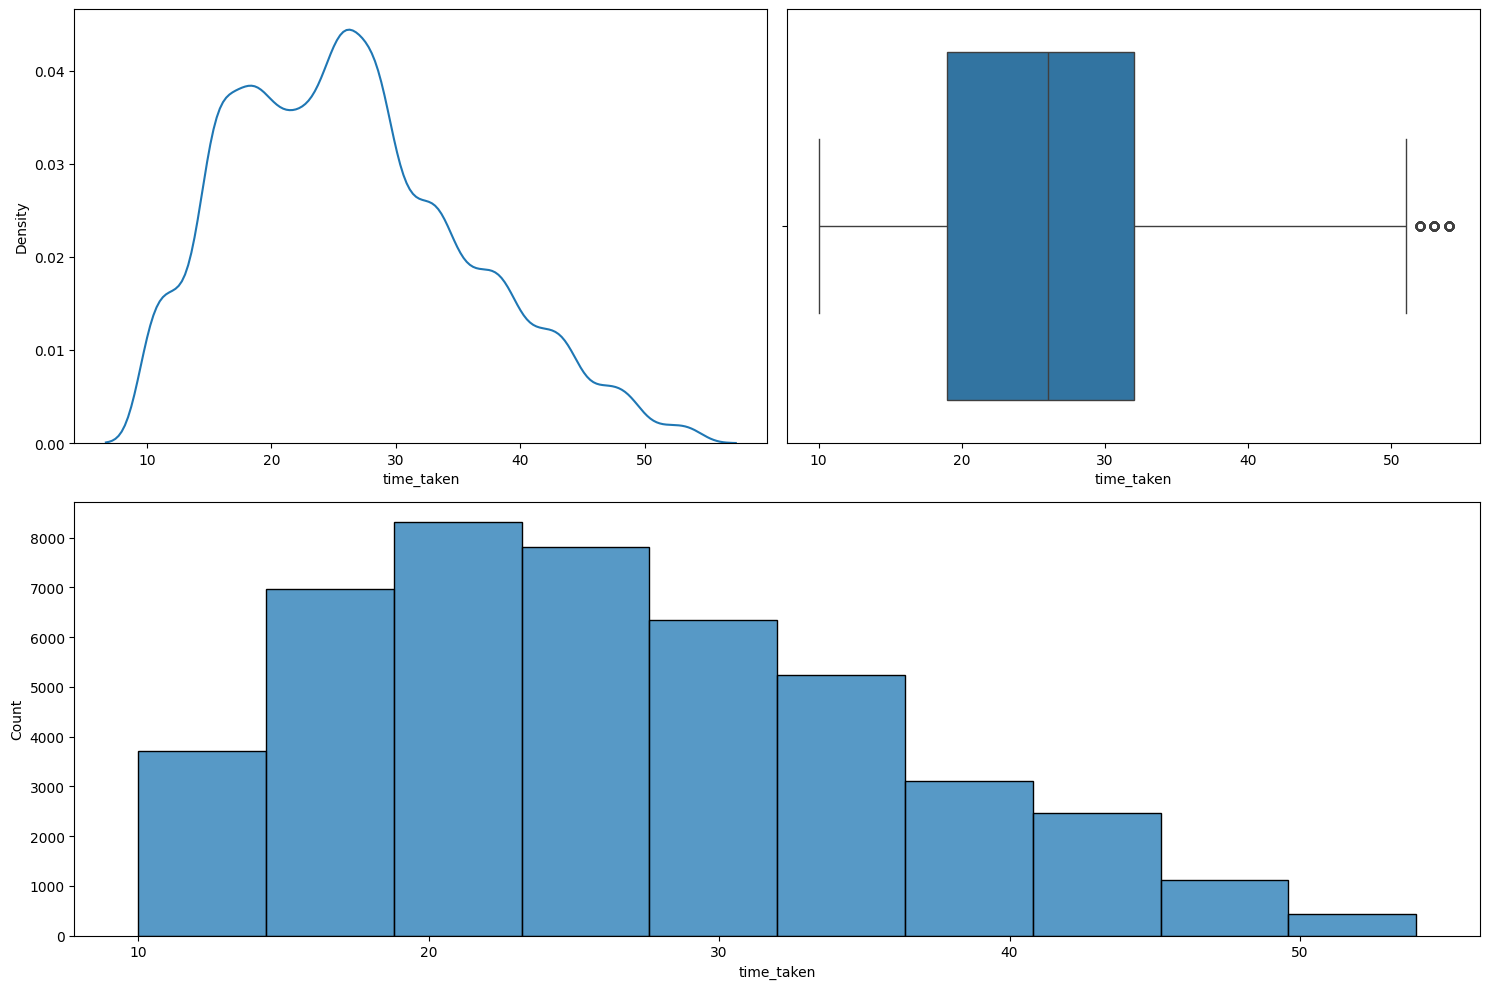

In [16]:
numerical_analysis(df_final, 'time_taken',bins=10)

**Obsevations**:
- The Kde plot shows a bimodal distribution.
- The target columns has some extreme values but they are possible.

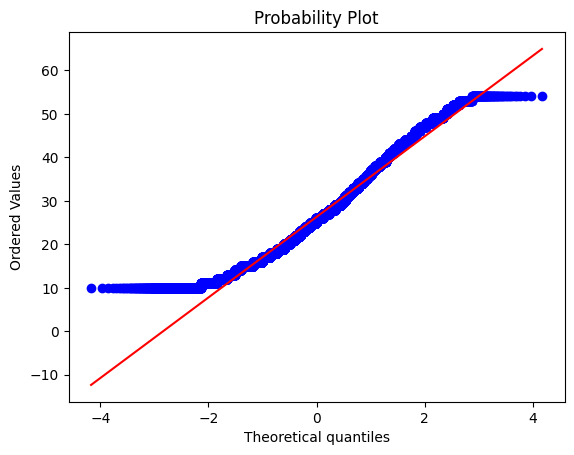

In [17]:
# Plot QQ plot for the target
probplot(df_final['time_taken'],plot=plt)
plt.show()

In [18]:
# Test for normality
test_for_normality(df_final, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [20]:
# Checkout the rows where data is acting as outlier
target_25_per, target_75_per = np.percentile(df_final['time_taken'],[25,75])
iqr = target_75_per - target_25_per
upper_bound = target_75_per + (1.5*iqr)
df_final.loc[(df_final['time_taken']>upper_bound),'traffic'].value_counts()

,count
traffic,
jam,241
high,24


In [21]:
df_final.loc[(df_final['time_taken']>upper_bound),'weather'].value_counts()

,count
weather,
Fog,57
Sunny,51
Windy,44
Cloudy,44
Stormy,37
Sandstorms,32


In [24]:
avg_distance = df_final['distance'].mean()
avg_distance_ext = df_final.loc[(df_final['time_taken']>upper_bound),'distance'].mean()
print(avg_distance,avg_distance_ext)

9.71925622902865 13.259733986308081


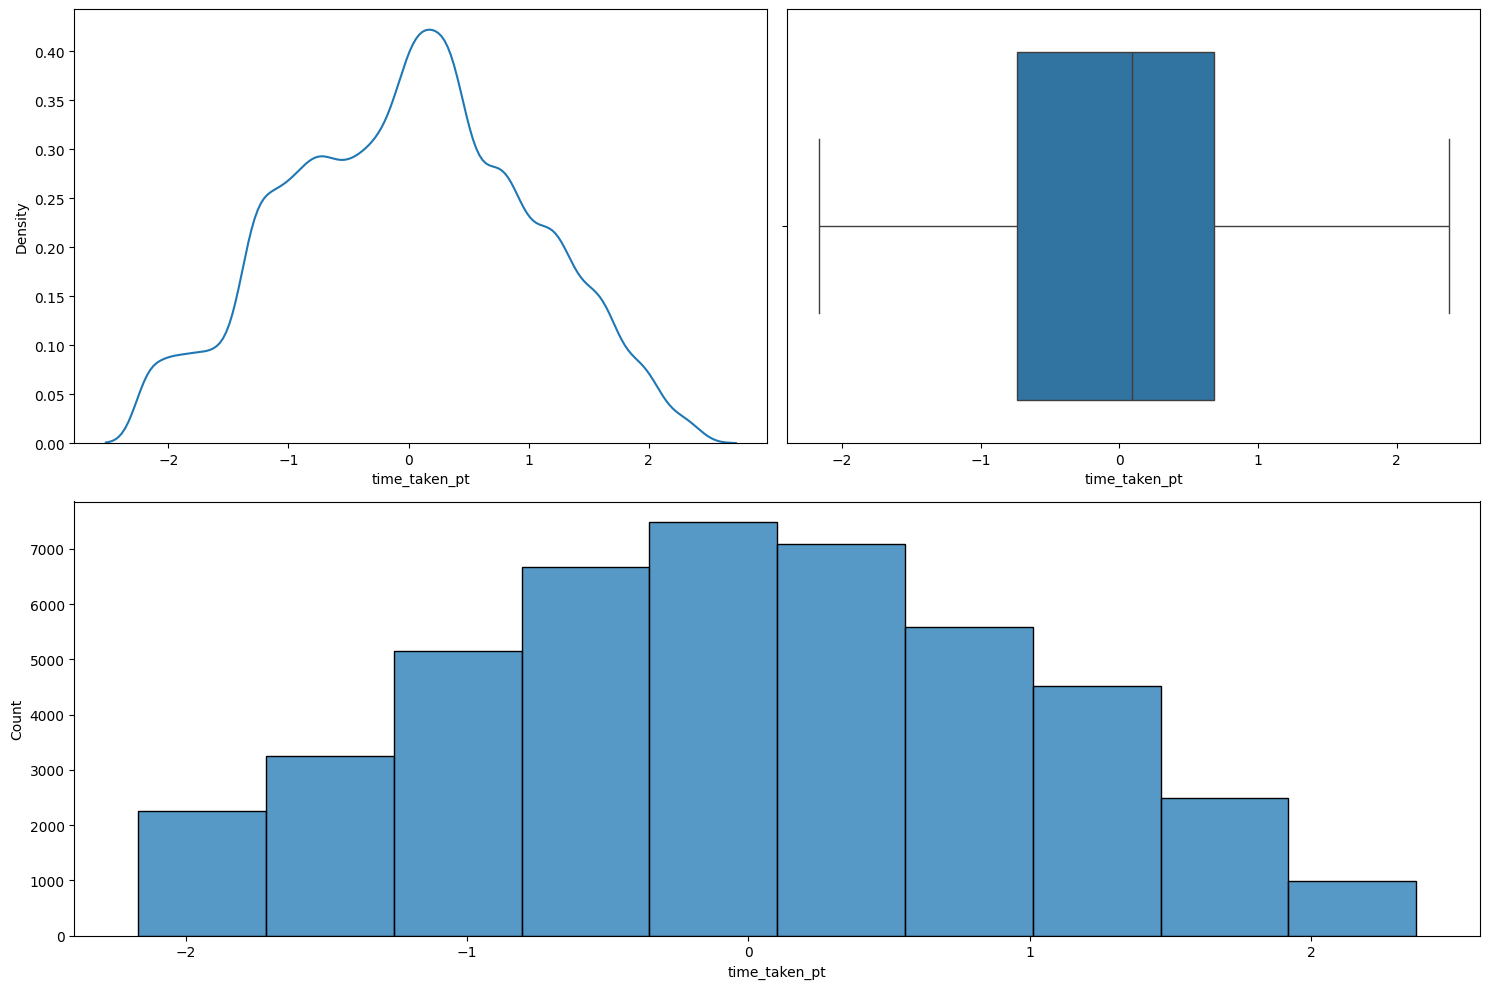

In [26]:
# Fix target column using transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
df_final['time_taken_pt'] = pt.fit_transform(df_final[['time_taken']])
numerical_analysis(df_final, 'time_taken_pt',bins=10)

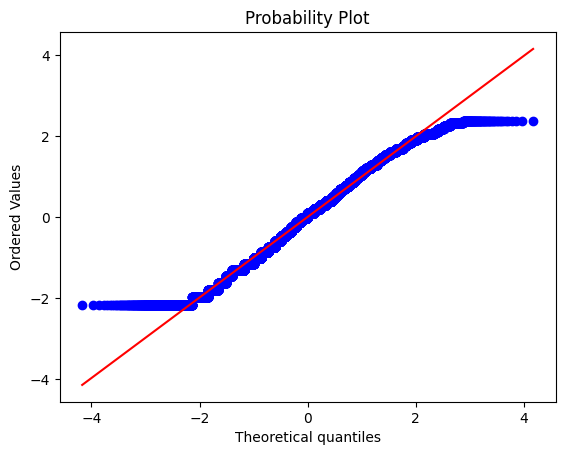

In [27]:
# Plot QQ plot for the target after transformation
probplot(df_final['time_taken_pt'],plot=plt)
plt.show()

In [30]:
df_final[['rider_id','age','ratings']]

,rider_id,age,ratings
0,INDORES13DEL02,37.0,4.9
1,BANGRES18DEL02,34.0,4.5
2,BANGRES19DEL01,23.0,4.4
3,COIMBRES13DEL02,38.0,4.7
4,CHENRES12DEL01,32.0,4.6
...,...,...,...
45497,JAPRES04DEL01,30.0,4.8
45498,AGRRES16DEL01,21.0,4.6
45499,CHENRES08DEL03,30.0,4.9
45500,COIMBRES11DEL01,20.0,4.7


In [32]:
rider_id_group = df_final[['rider_id','age','ratings']].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

,rider_id,age,ratings
92,AGRRES010DEL01,34.0,4.7
7738,AGRRES010DEL01,21.0,4.7
4554,AGRRES010DEL01,38.0,4.7
12416,AGRRES010DEL01,34.0,4.5
13223,AGRRES010DEL01,39.0,4.4
...,...,...,...
861,VADRES20DEL03,35.0,4.8
9792,VADRES20DEL03,30.0,4.6
9753,VADRES20DEL03,38.0,4.8
5094,VADRES20DEL03,35.0,4.9


In [34]:
df_final[['rider_id','age','ratings']].dropna().duplicated(keep=False).sum()

np.int64(10155)

In [35]:
# filter the duplicates
(
    df_final.loc[(df_final[['rider_id','age','ratings']].duplicated(keep=False)),['rider_id','age','ratings']]
    .dropna()
    .sort_values(['rider_id'])
)

,rider_id,age,ratings
18533,AGRRES03DEL02,24.0,4.9
40285,AGRRES03DEL02,24.0,4.9
28473,AGRRES03DEL03,30.0,4.7
26275,AGRRES03DEL03,30.0,4.7
36131,AGRRES06DEL02,36.0,4.9
...,...,...,...
12742,VADRES20DEL02,28.0,4.5
5094,VADRES20DEL03,35.0,4.9
17963,VADRES20DEL03,35.0,4.9
21957,VADRES20DEL03,37.0,4.9


In [ ]:
# numerical_analysis of age


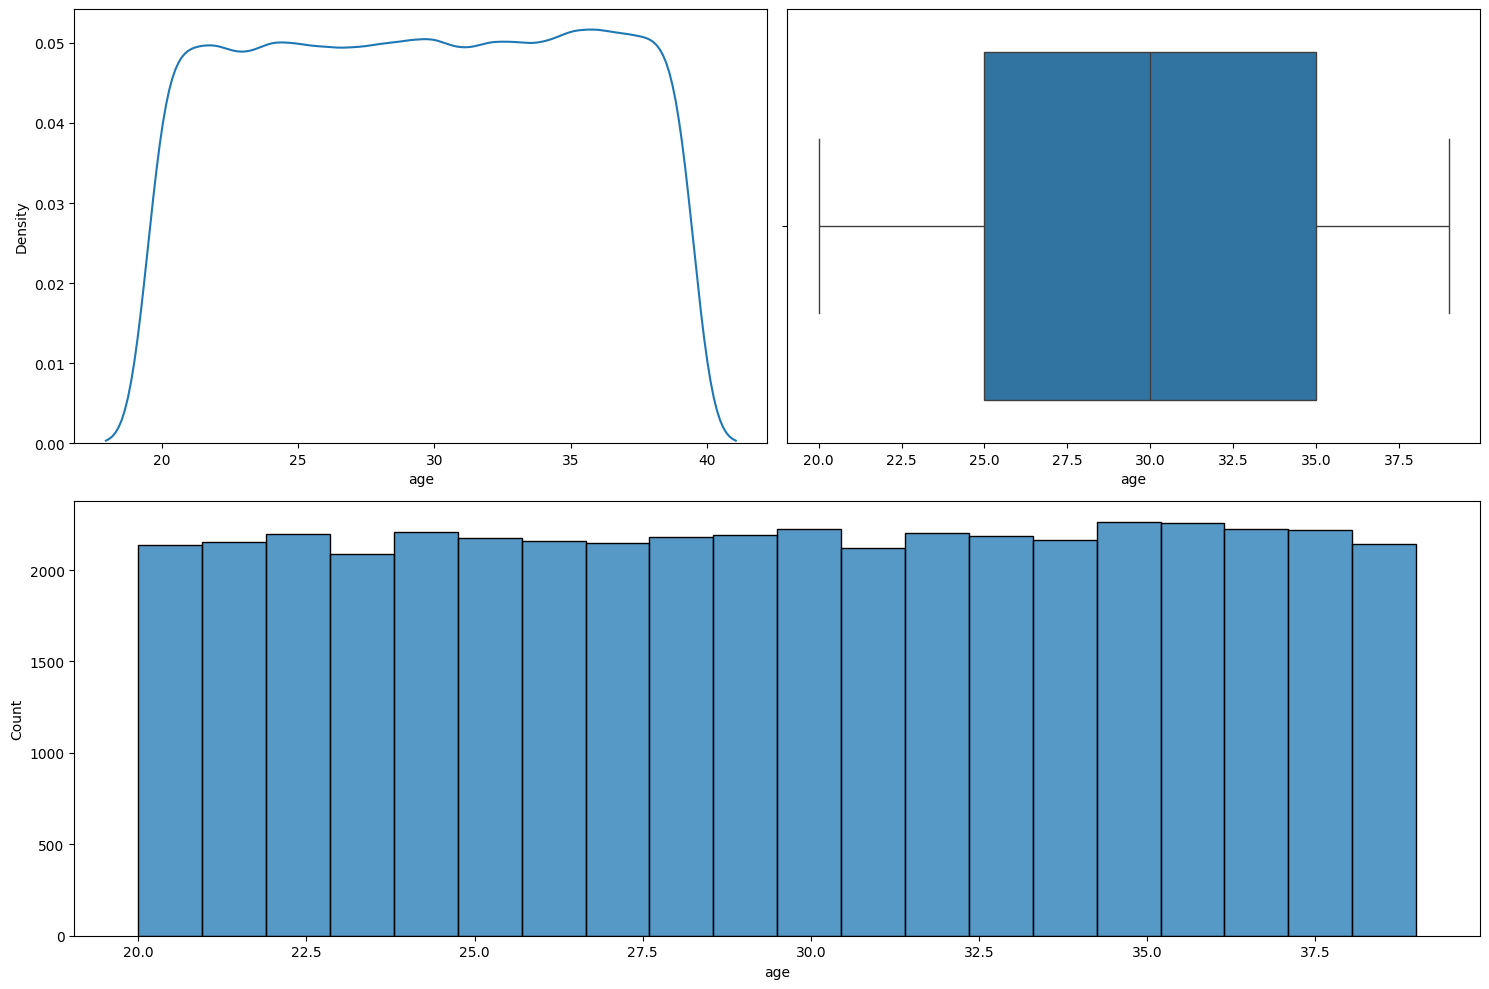

In [36]:
numerical_analysis(df_final, 'age', bins=20)

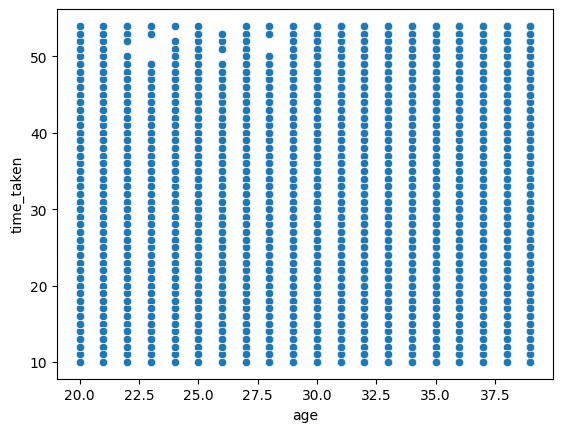

In [37]:
# relationship between target and age
sns.scatterplot(data = df_final, x = 'age',y='time_taken')
plt.show()

Age of the rider does not show any impact on time taken to deliver

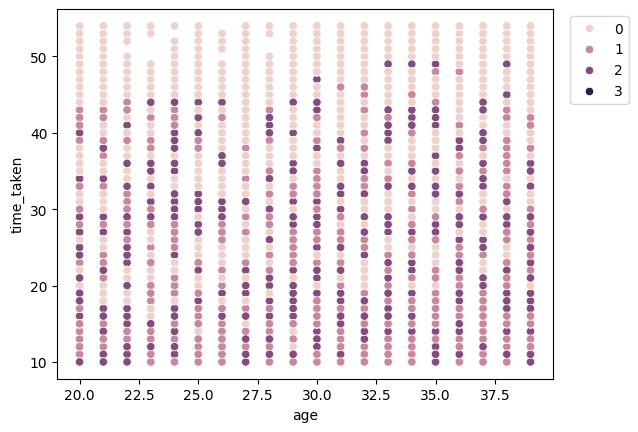

In [38]:
sns.scatterplot(data=df_final, x='age', y='time_taken',hue='vehicle_condition')
plt.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

<Axes: xlabel='type_of_vehicle', ylabel='age'>

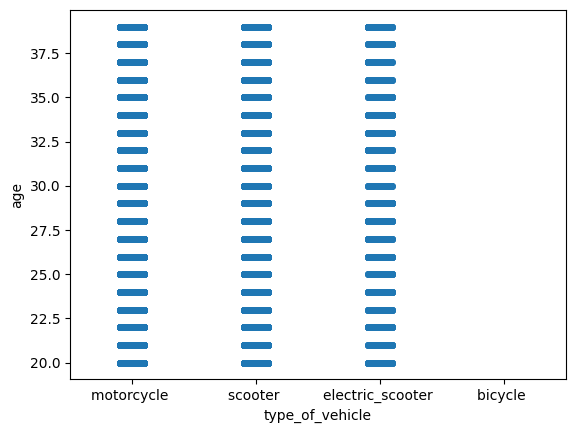

In [39]:
# preference of vehicle by age
sns.stripplot(df_final,x='type_of_vehicle', y='age')

Ratings

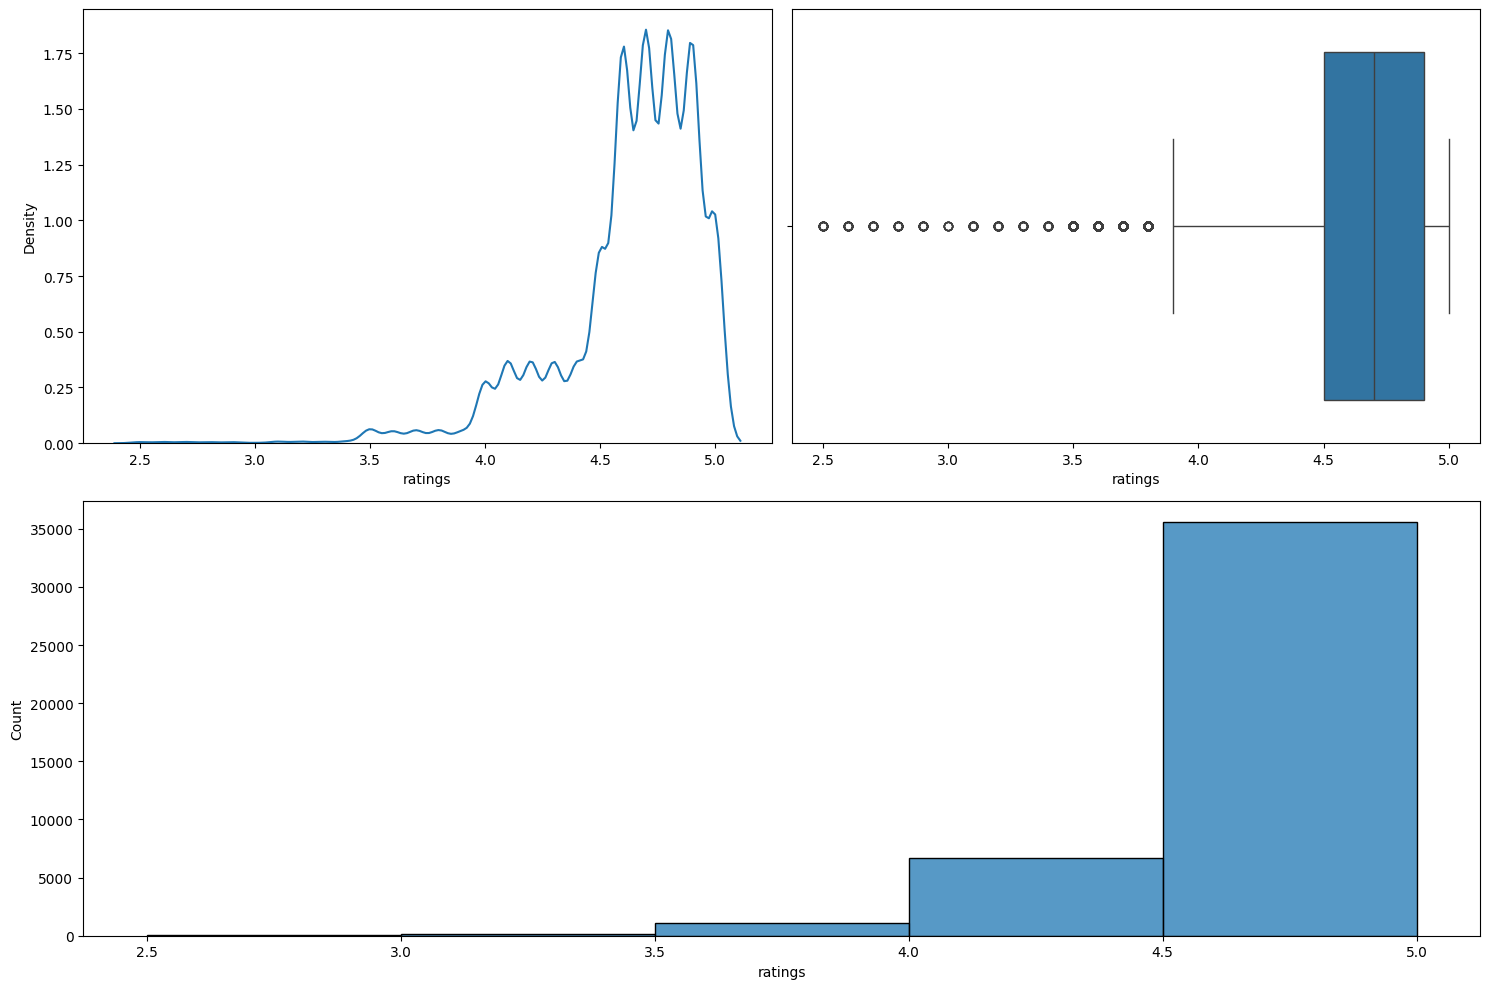

In [40]:
numerical_analysis(df_final,'ratings',bins=5)

<Axes: xlabel='ratings', ylabel='time_taken'>

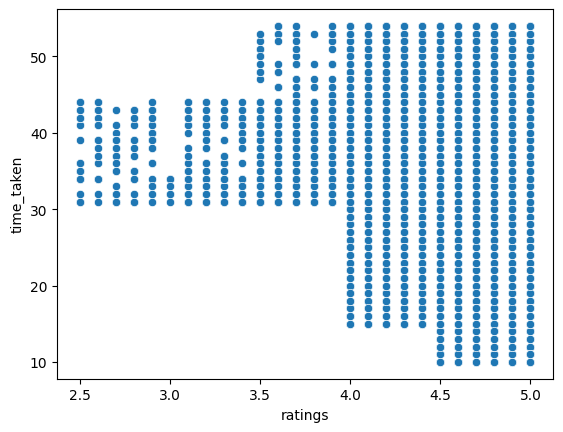

In [41]:
sns.scatterplot(data=df_final,x='ratings', y = 'time_taken')

No strong relationship is visually evident between ratings and time_taken.



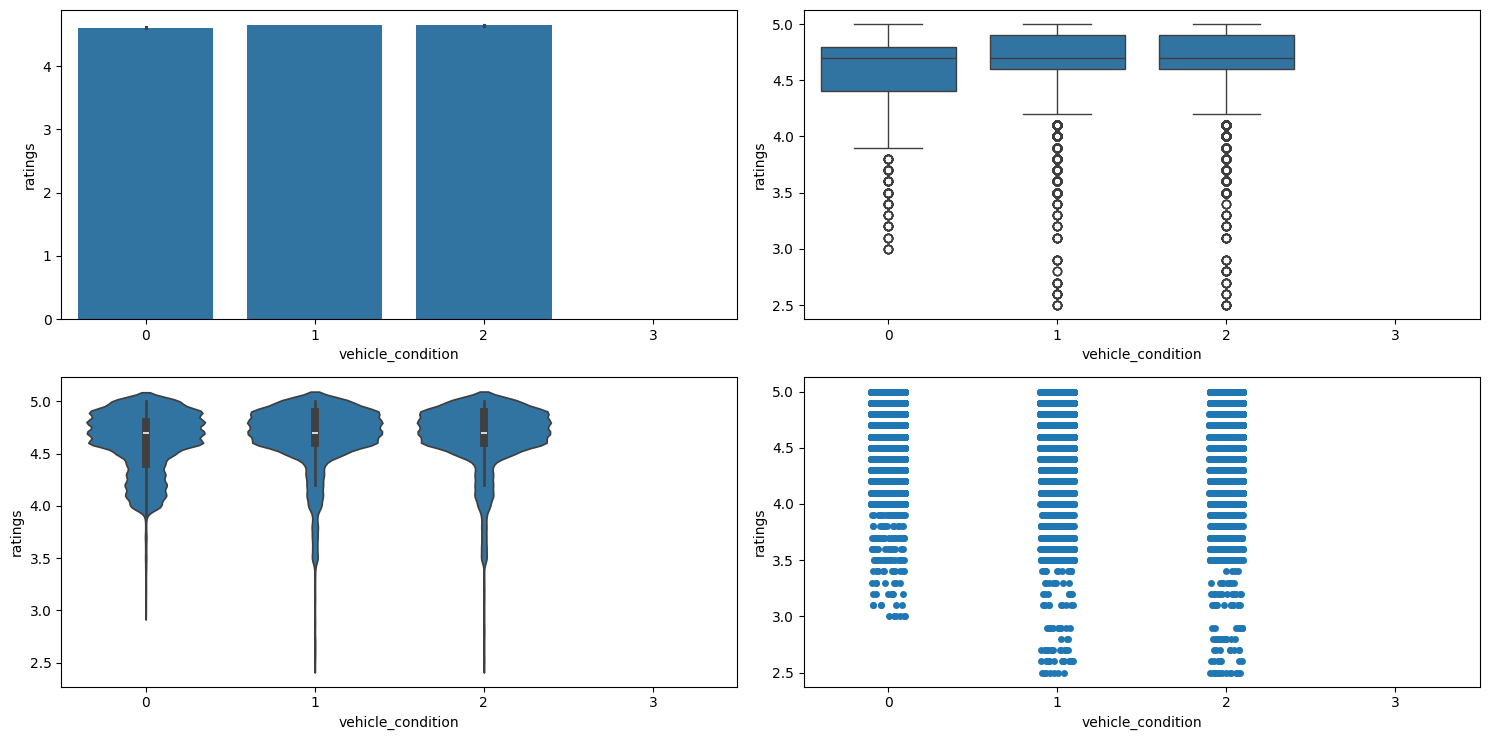

In [44]:
# does rating get affected by vehicle type
numerical_categorical_analysis(df_final,'vehicle_condition','ratings')

- The more worst the vehicle is, the more lower the rating gets
- The category 3 has no data means there are NaN values, This simply means that customers avoid rating even 1 when vehicle is not good.

In [45]:
(
    df_final[["ratings",'vehicle_condition']]
    .loc[df_final["vehicle_condition"]==3,'ratings']
    .value_counts(dropna=False)
)

,count
ratings,
NaN,429


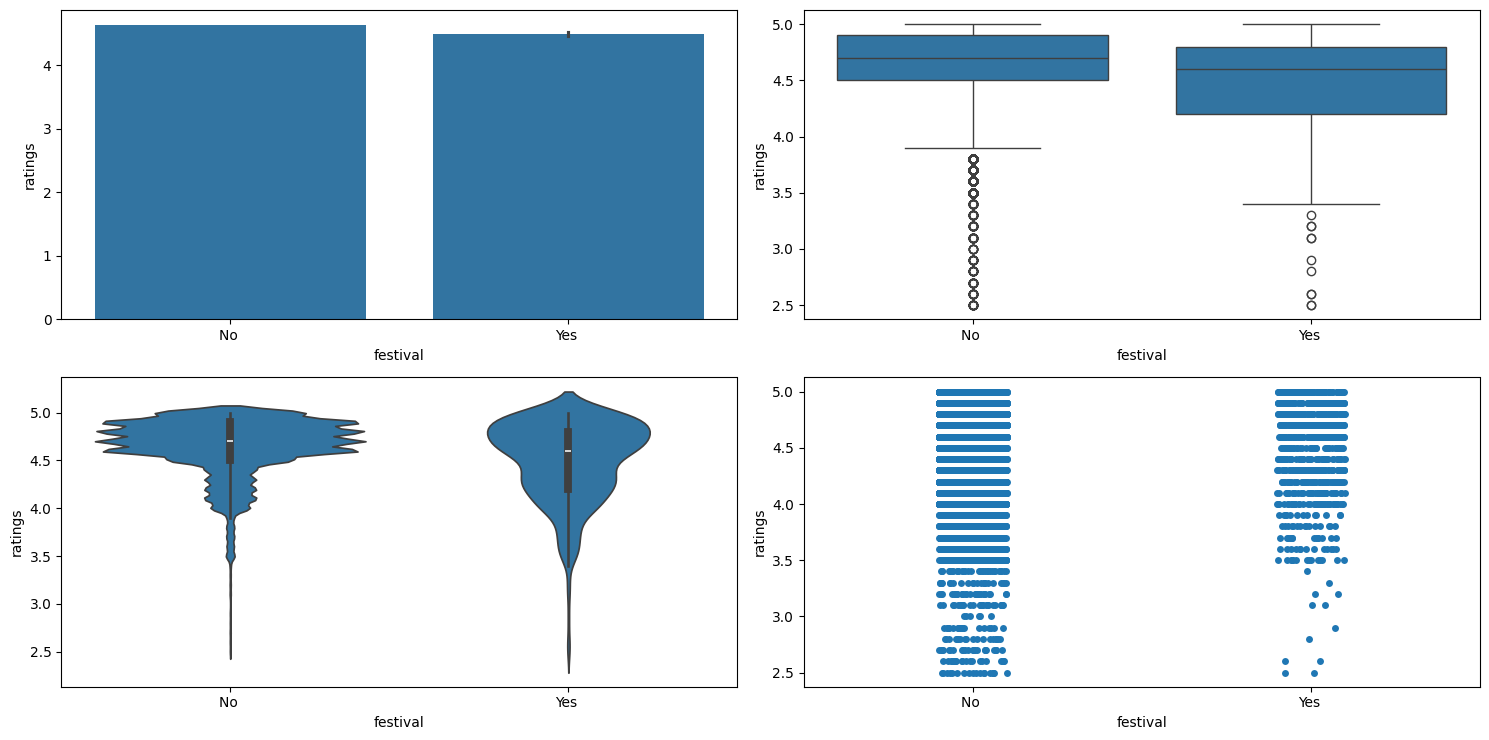

In [46]:
# festivals and rider ratings
numerical_categorical_analysis(df_final,'festival','ratings')

Order Date


In [47]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'City_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time', 'order_hour',
       'order_period', 'distance', 'time_taken_pt'],
      dtype='object')

In [48]:
df_final.filter(like='order')

,order_date,type_of_order,order_day,order_month,order_day_of_week,order_hour,order_period
0,2022-03-19,snack,Saturday,3,19,11.0,Morning
1,2022-03-25,snack,Friday,3,25,19.0,Evening
2,2022-03-19,drinks,Saturday,3,19,8.0,Morning
3,2022-04-05,buffet,Tuesday,4,5,18.0,Evening
4,2022-03-26,snack,Saturday,3,26,13.0,Afternoon
...,...,...,...,...,...,...,...
45497,2022-03-24,meal,Thursday,3,24,11.0,Morning
45498,2022-02-16,buffet,Wednesday,2,16,19.0,Evening
45499,2022-03-11,drinks,Friday,3,11,23.0,Night
45500,2022-03-07,snack,Monday,3,7,13.0,Afternoon


In [49]:
order_date_subset = df_final.loc[:,['order_date','order_day','order_month','order_day_of_week','is_weekend','festival']]
order_date_subset

,order_date,order_day,order_month,order_day_of_week,is_weekend,festival
0,2022-03-19,Saturday,3,19,1,No
1,2022-03-25,Friday,3,25,0,No
2,2022-03-19,Saturday,3,19,1,No
3,2022-04-05,Tuesday,4,5,0,No
4,2022-03-26,Saturday,3,26,1,No
...,...,...,...,...,...,...
45497,2022-03-24,Thursday,3,24,0,No
45498,2022-02-16,Wednesday,2,16,0,No
45499,2022-03-11,Friday,3,11,0,No
45500,2022-03-07,Monday,3,7,0,No


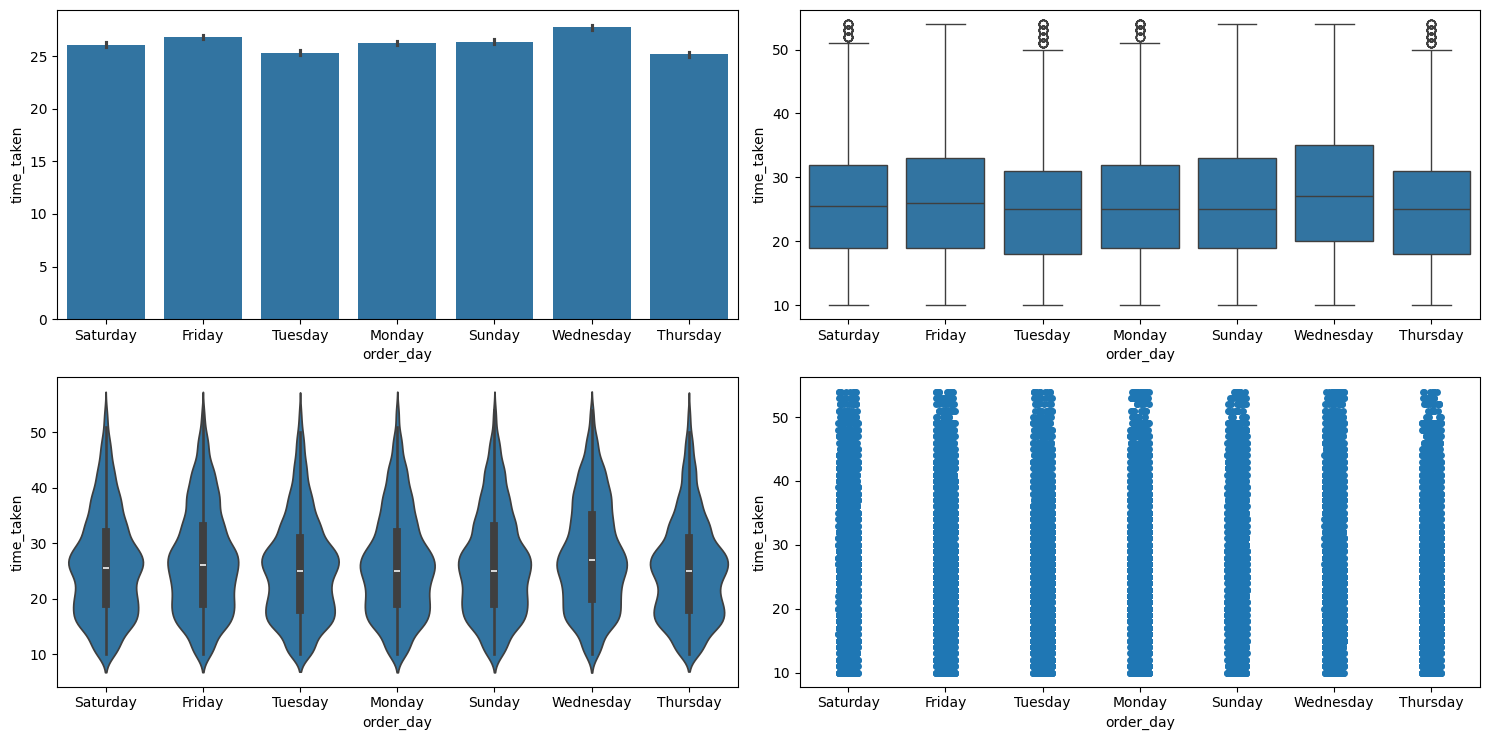

In [50]:
# analysis between day of week and target
numerical_categorical_analysis(df_final,'order_day','time_taken')

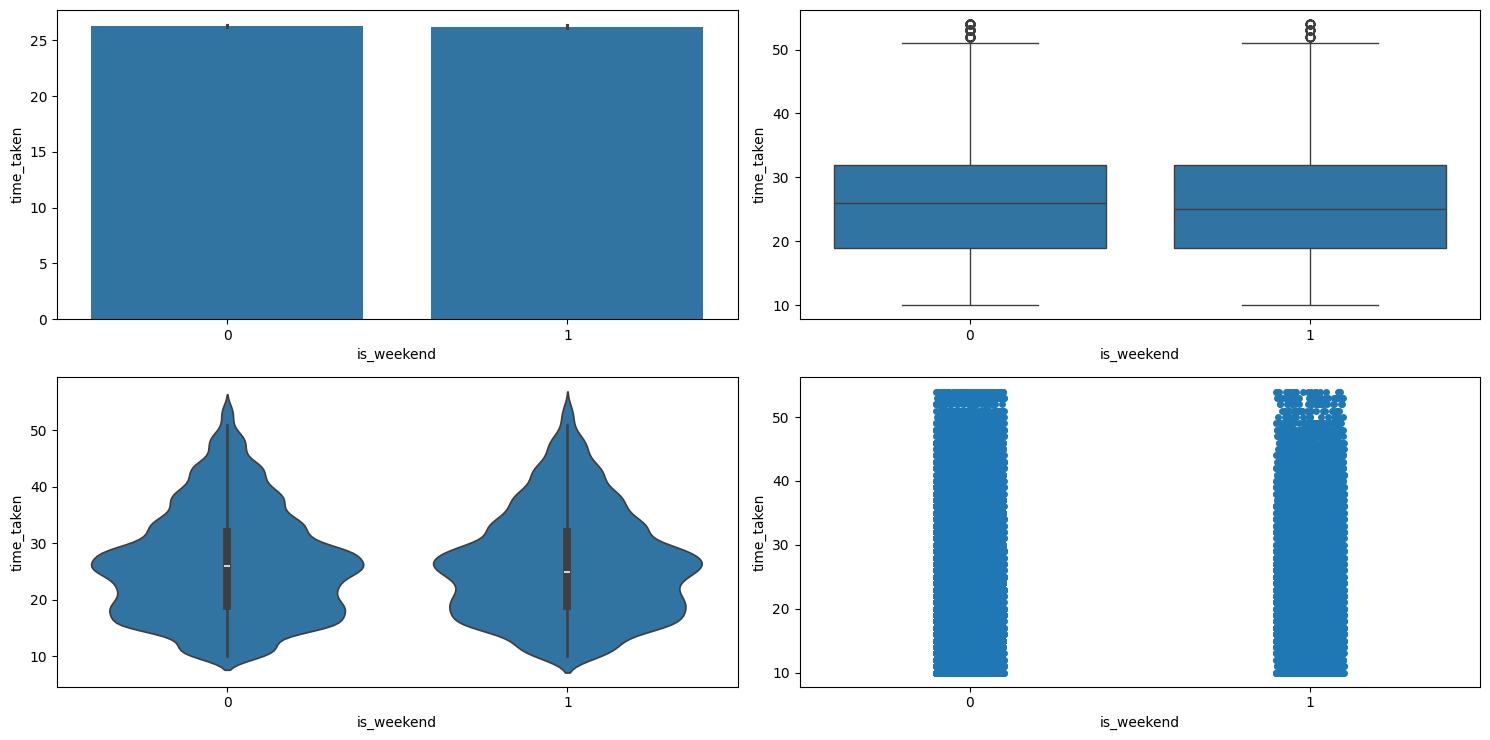

In [51]:
numerical_categorical_analysis(df_final,'is_weekend','time_taken')

In [52]:
chi_2_test(df_final,'is_weekend','traffic')

0.6845961396354259
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


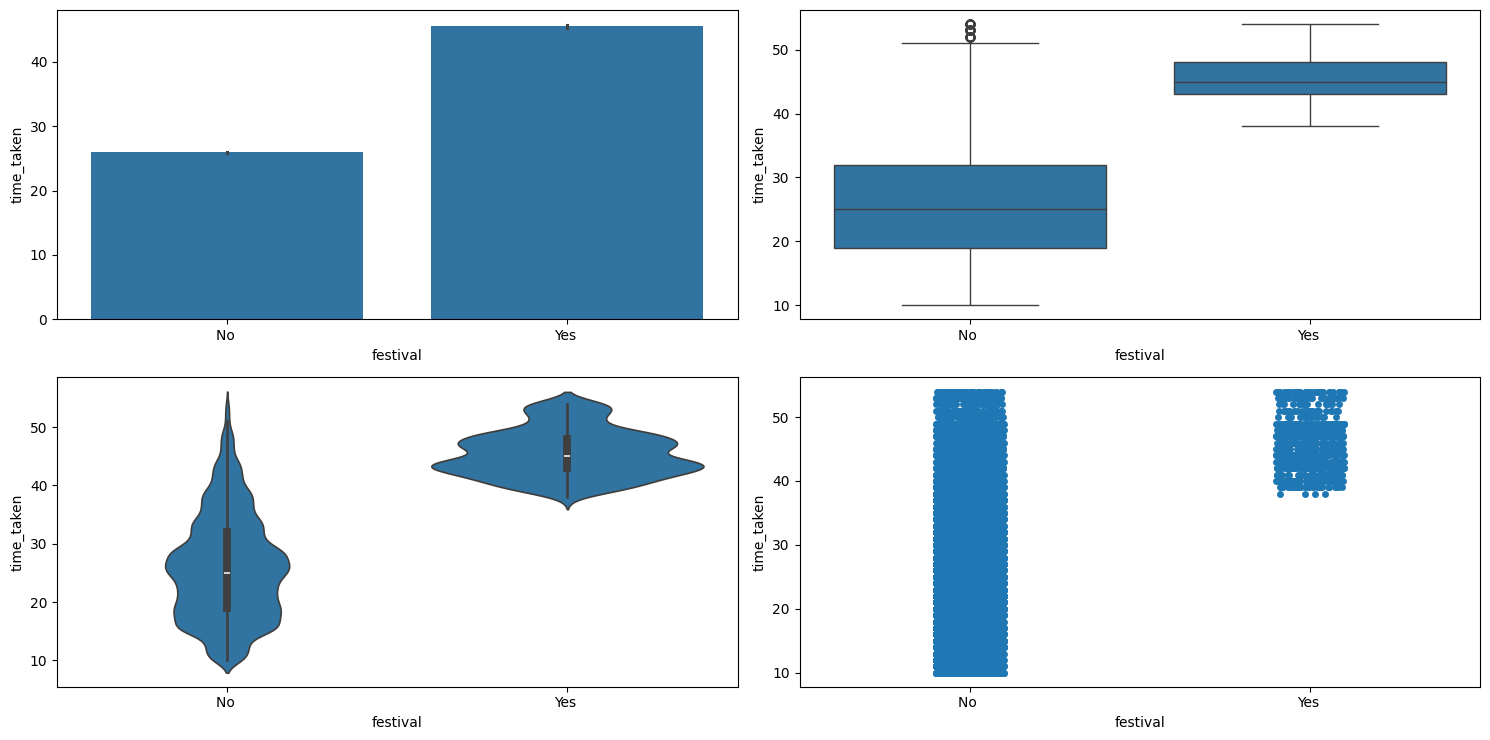

In [54]:
numerical_categorical_analysis(df_final,'festival','time_taken')

Observations
1. The average time for delivery varies when there is festival.
2. The range of delivery time is shorter when there is festival with litle variation, taking longer delivery times


In [55]:
# do festivals affect traffic
chi_2_test(df_final,'festival','traffic')

1.1223471129146869e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


In [56]:
df_final.pivot_table(index='traffic',columns='festival',values='time_taken',aggfunc='mean')

festival,No,Yes
traffic,,
high,27.010373,45.826087
jam,30.538039,46.093651
low,21.284332,42.020000
medium,26.550288,43.715385


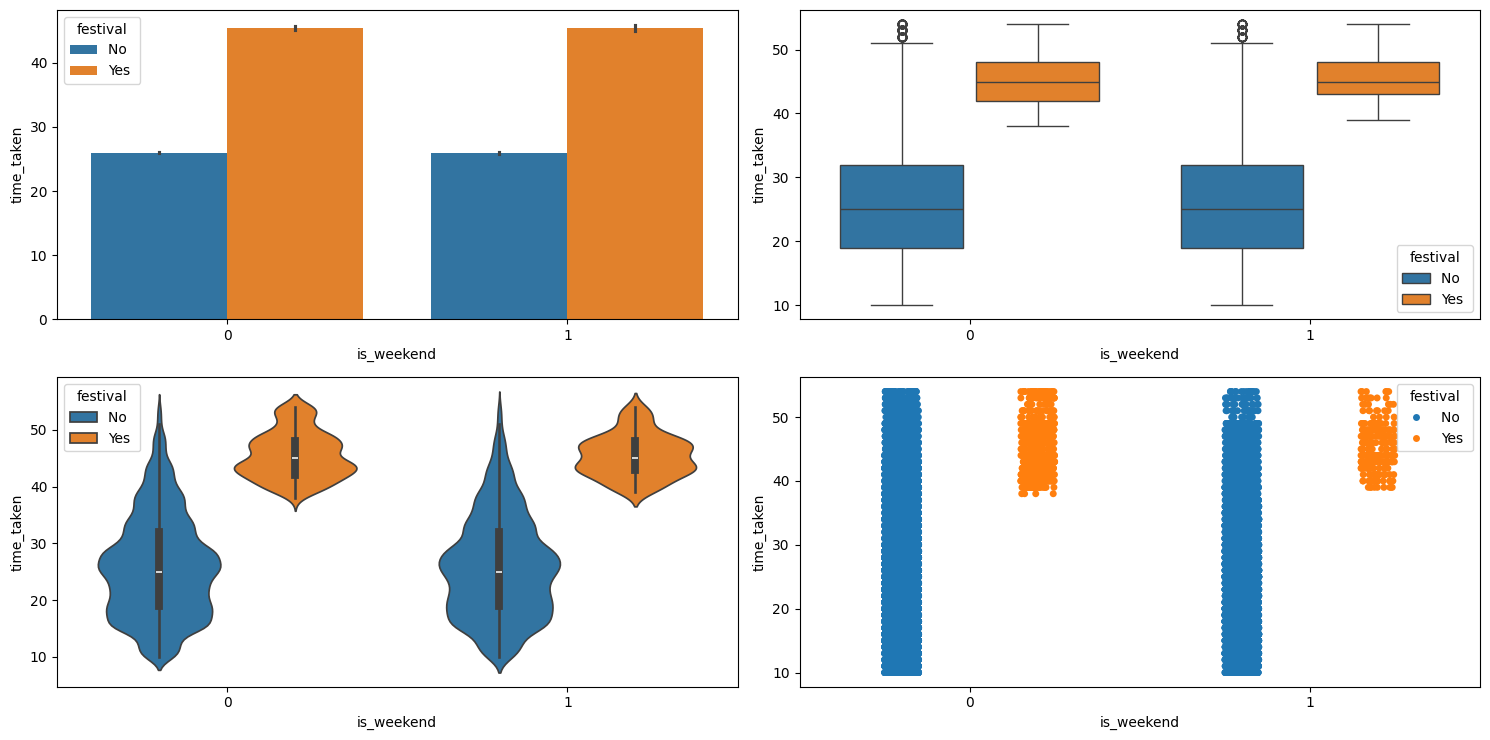

In [57]:
# does a weekend and a festival combined have an effect on delivery time
multivariate_analysis(df_final,'time_taken','is_weekend','festival')

Order Time

In [58]:
df_final.columns


Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'City_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time', 'order_hour',
       'order_period', 'distance', 'time_taken_pt'],
      dtype='object')

In [59]:
time_subset = df_final.loc[:,['order_hour', 'order_period','pickup_time']]
time_subset

,order_hour,order_period,pickup_time
0,11.0,Morning,15.0
1,19.0,Evening,5.0
2,8.0,Morning,15.0
3,18.0,Evening,10.0
4,13.0,Afternoon,15.0
...,...,...,...
45497,11.0,Morning,10.0
45498,19.0,Evening,15.0
45499,23.0,Night,15.0
45500,13.0,Afternoon,5.0


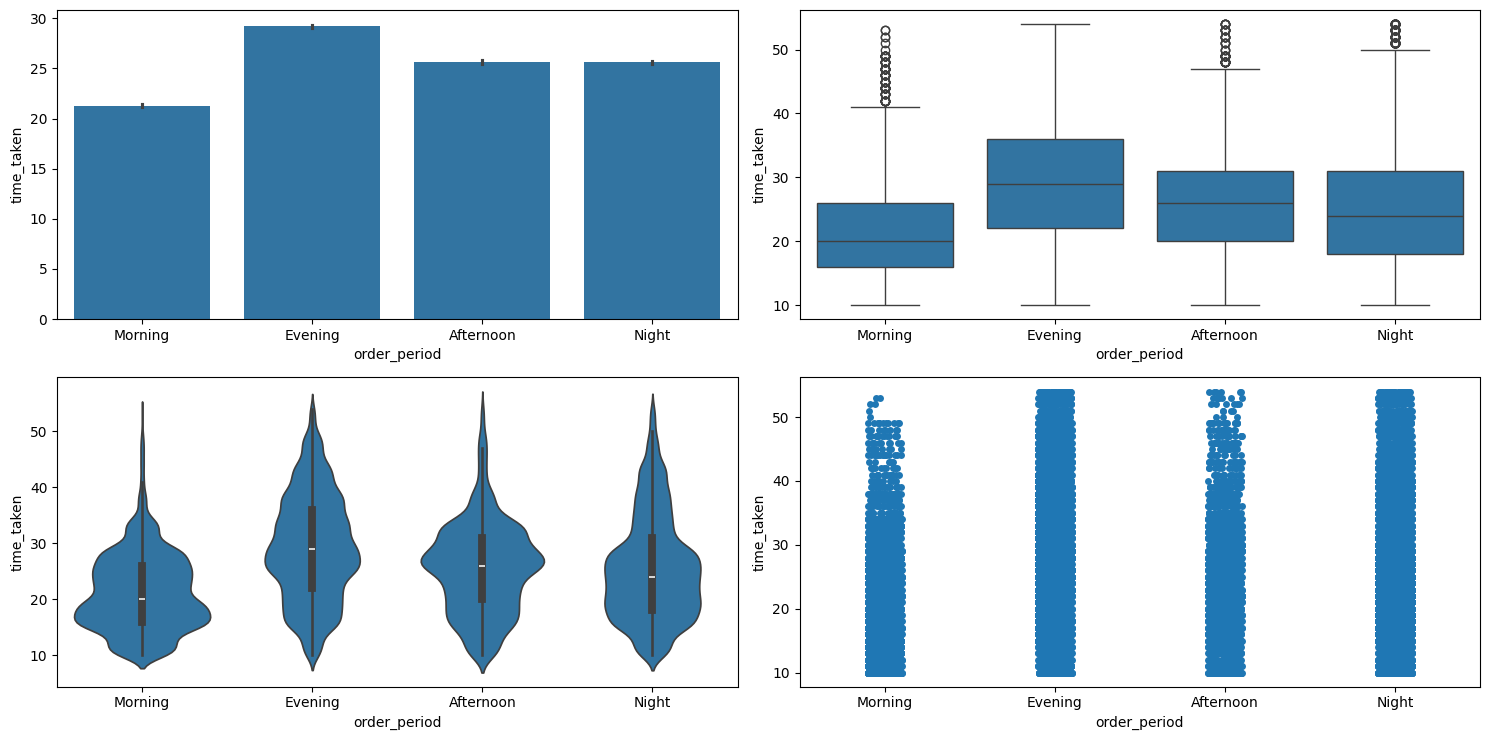

In [61]:
# does time of day affects delivery times
numerical_categorical_analysis(df_final, 'order_period','time_taken')

In [62]:
anova_test(df_final,'time_taken','order_period')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and order_period.


In [64]:
# Top 5 hrs of day at which customer orders the most
df_final['order_hour'].value_counts().head(5)

,count
order_hour,
21.0,4686
19.0,4595
22.0,4576
20.0,4539
23.0,4511


,Count,Percentage
order_hour,,
21.0,4686,10.68%
19.0,4595,10.48%
22.0,4576,10.43%
20.0,4539,10.35%
23.0,4511,10.28%
18.0,4480,10.21%
17.0,4278,9.75%
10.0,1991,4.54%
11.0,1962,4.47%


**************************************************
The unique categories in order_hour column are [11.0, 19.0, 8.0, 18.0, 13.0, 21.0, 17.0, 20.0, 14.0, 9.0, 22.0, 12.0, 23.0, nan, 10.0, 16.0, 15.0, 0.0]
**************************************************
The number of categories in order_hour coumn are 17


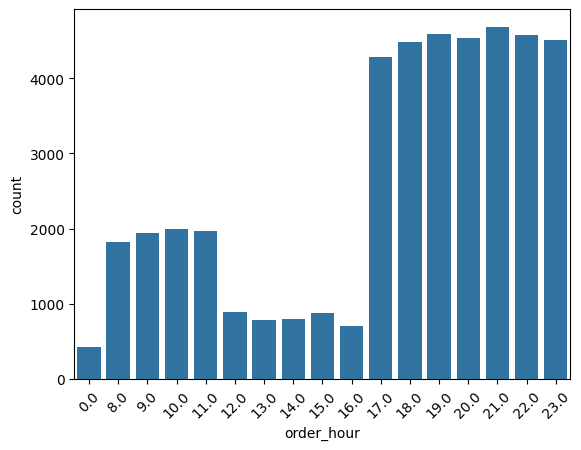

In [65]:
categorical_analysis(df_final,'order_hour')

,Count,Percentage
order_period,,
Evening,17892,39.32%
Night,15843,34.82%
Morning,7718,16.96%
Afternoon,4049,8.9%


**************************************************
The unique categories in order_period column are ['Morning', 'Evening', 'Afternoon', 'Night']
**************************************************
The number of categories in order_period coumn are 4


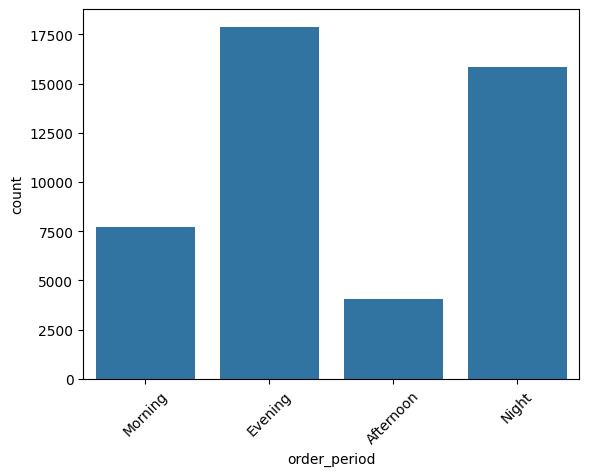

In [66]:
categorical_analysis(df_final,'order_period')

Pickup Time

<Axes: xlabel='pickup_time', ylabel='time_taken'>

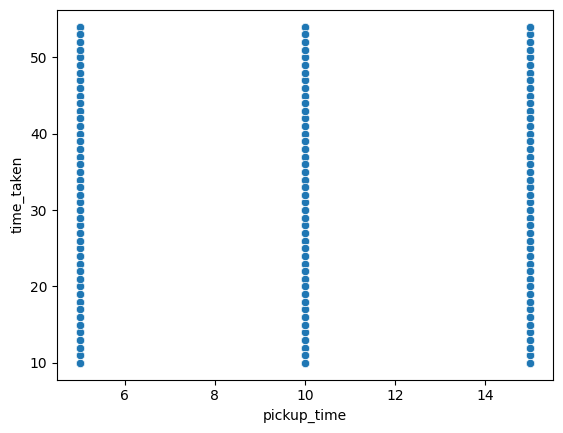

In [68]:
# relationship between pickup time and delivery time
sns.scatterplot(df_final,x='pickup_time',y='time_taken')

In [ ]:
# convert the column to ordinal categorical varibale

,Count,Percentage
pickup_time,,
5.0,14703,33.52%
15.0,14610,33.31%
10.0,14549,33.17%


**************************************************
The unique categories in pickup_time column are [15.0, 5.0, 10.0, nan]
**************************************************
The number of categories in pickup_time coumn are 3


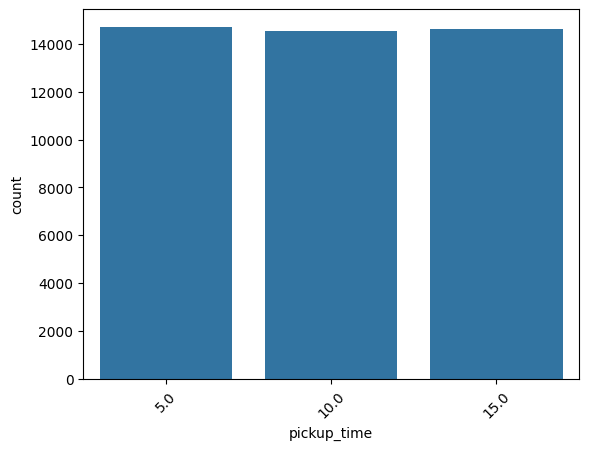

In [69]:
# pickup time categorical analysis
categorical_analysis(df_final,"pickup_time")

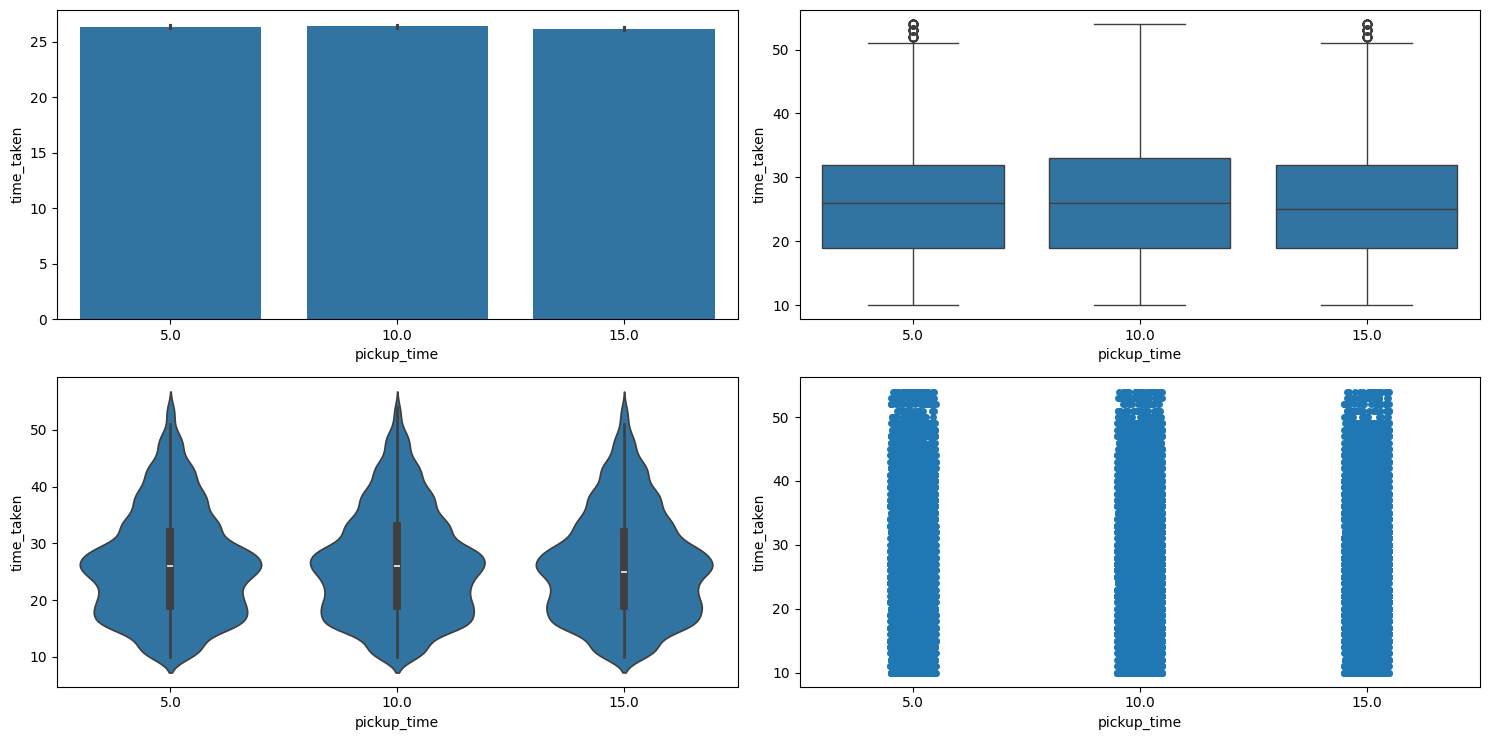

In [70]:
numerical_categorical_analysis(df_final,'pickup_time','time_taken')

In [71]:
anova_test(df_final,'time_taken','pickup_time')

0.09932647028954891
Fail to reject the null hypothesis. There is no significant relationship between time_taken and pickup_time.


Traffic

,Count,Percentage
traffic,,
low,15477,34.4%
jam,14143,31.43%
medium,10947,24.33%
high,4425,9.84%


**************************************************
The unique categories in traffic column are ['high', 'jam', 'low', 'medium', nan]
**************************************************
The number of categories in traffic coumn are 4


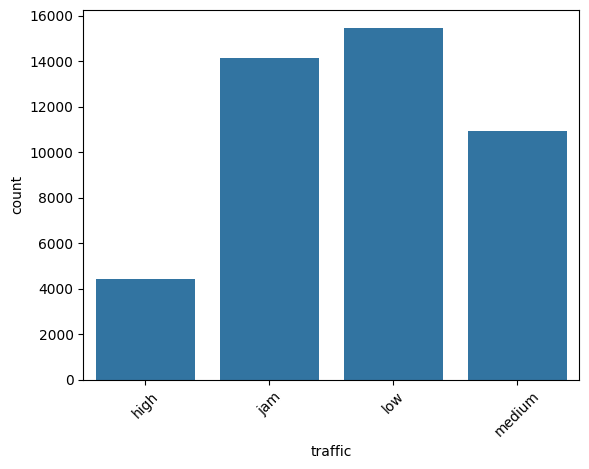

In [72]:
categorical_analysis(df_final,'traffic')

In [73]:
chi_2_test(df_final,'traffic','city_type')

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between traffic and city_type.


In [74]:
chi_2_test(df_final,'traffic','City_name')

0.4978080180955253
Fail to reject the null hypothesis. There is no significant association between traffic and City_name.


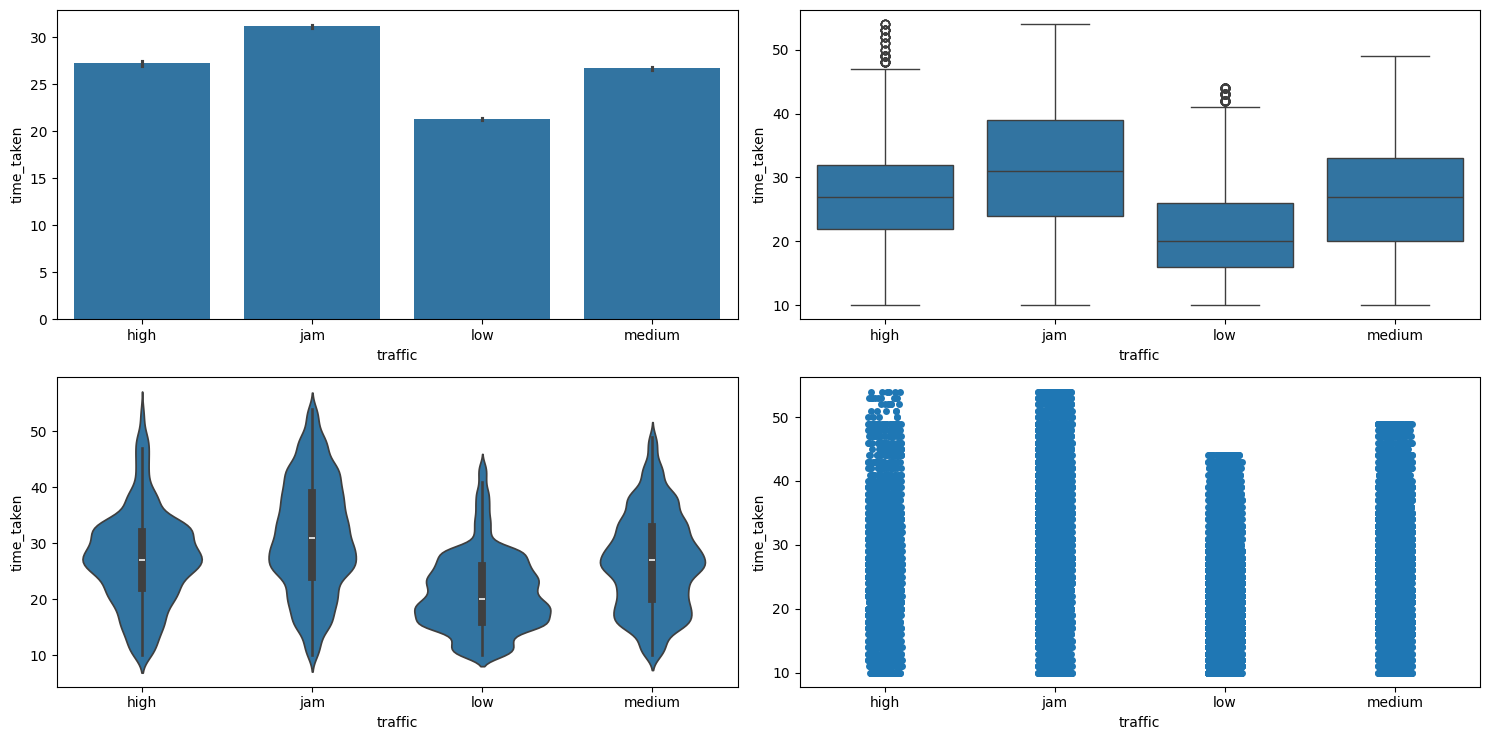

In [75]:
numerical_categorical_analysis(df_final,'traffic','time_taken')

In [76]:
 anova_test(df_final,'time_taken','traffic')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and traffic.


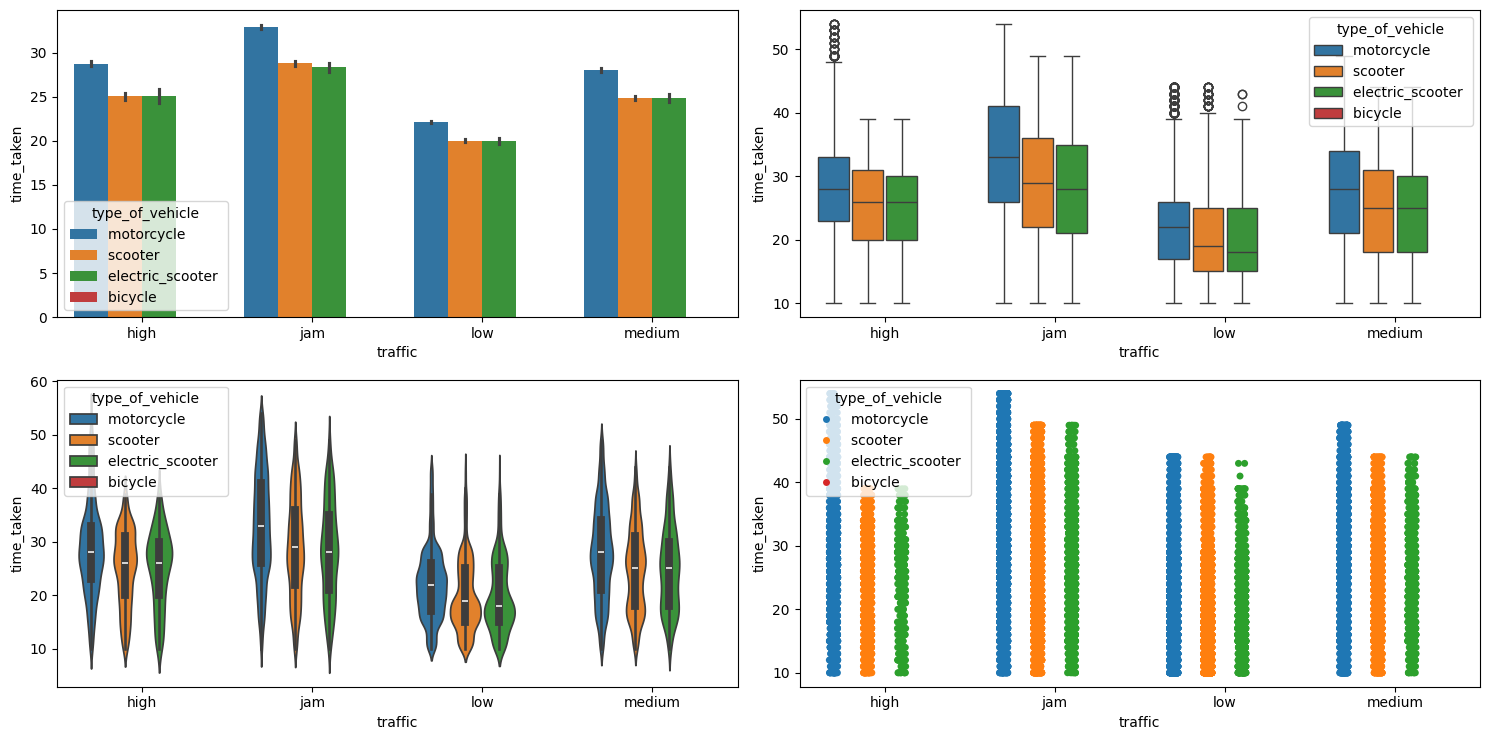

In [77]:
# are some vehicle type suitable in traffic than others
multivariate_analysis(df_final,'time_taken','traffic','type_of_vehicle')

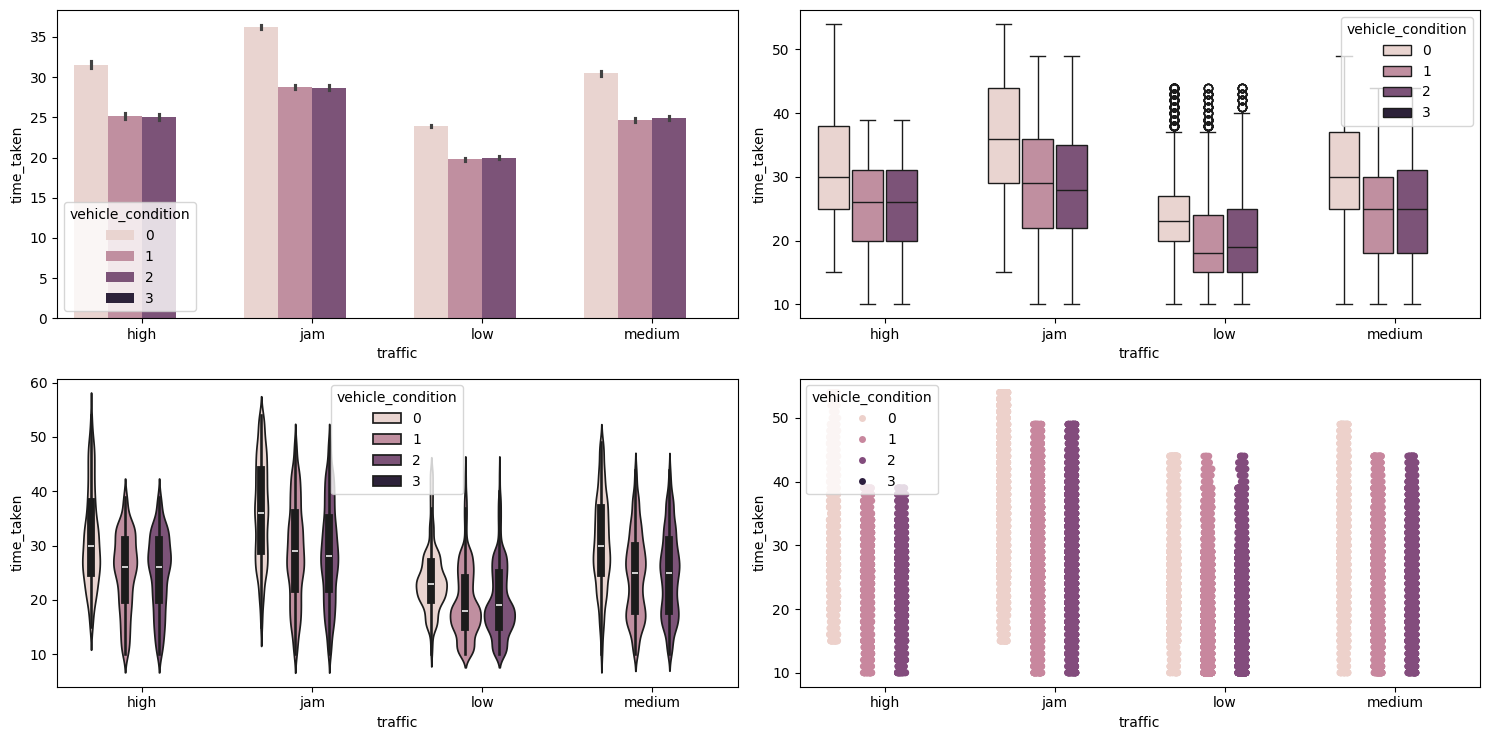

In [78]:
# does vehicle condition in traffic situation affect delivery times
multivariate_analysis(df_final,'time_taken','traffic','vehicle_condition')

The riders with vehicles in good condition are generally preferered for longer delivery times.

In [ ]:
# Multiple Deliveries


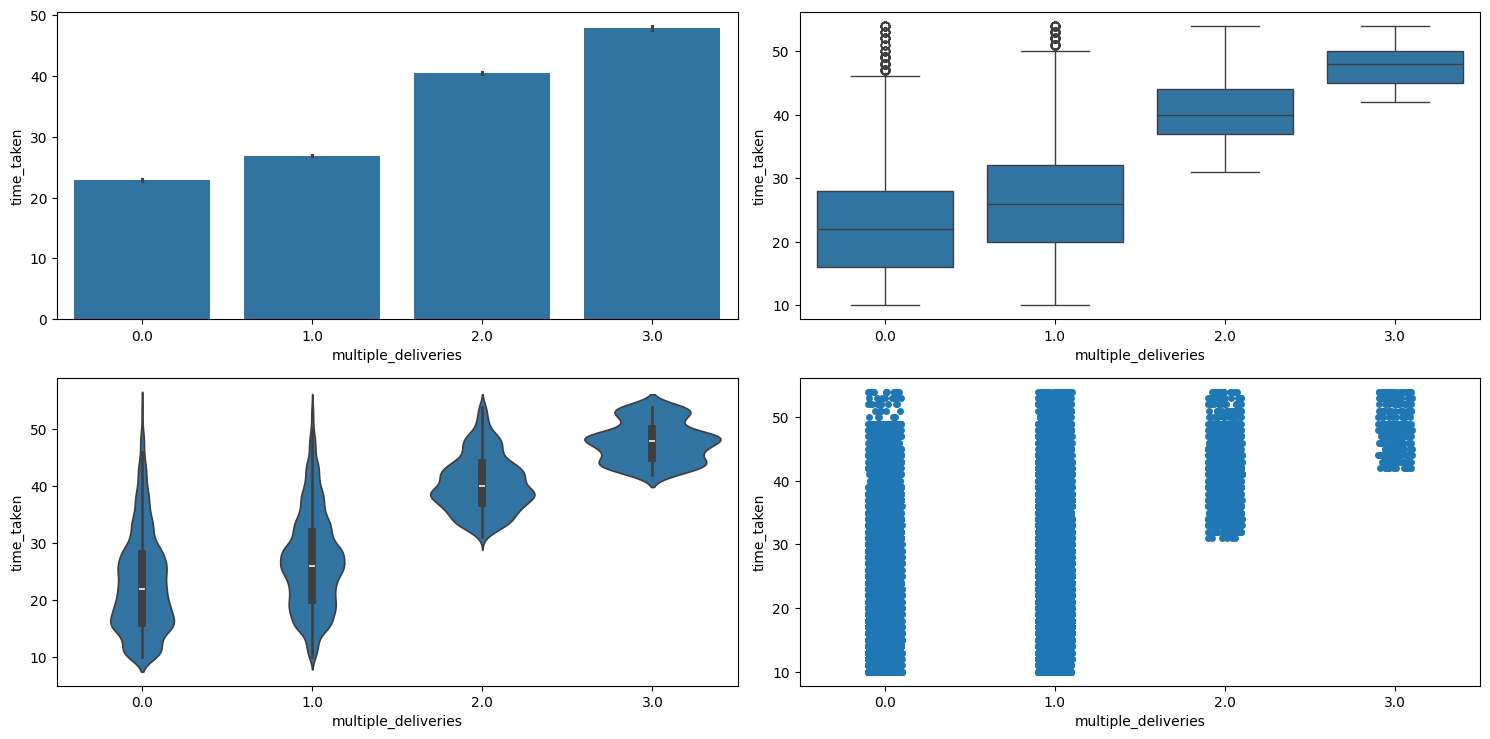

In [79]:
numerical_categorical_analysis(df_final,'multiple_deliveries','time_taken')

In [80]:
anova_test(df_final,'time_taken','multiple_deliveries')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and multiple_deliveries.


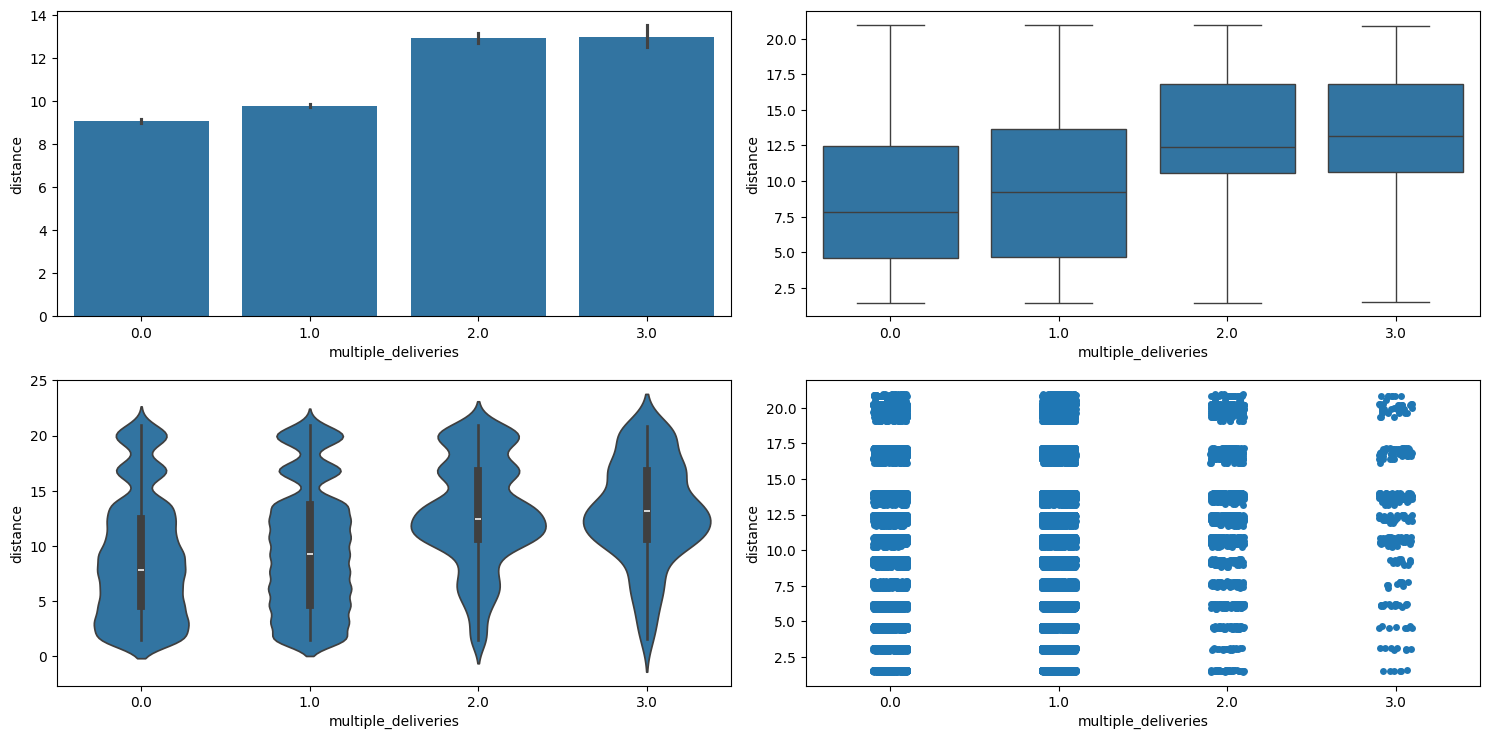

In [81]:
# do multiple deliveries are of longer distance
numerical_categorical_analysis(df_final,'multiple_deliveries','distance')

Weather


,Count,Percentage
weather,,
Fog,7654,17.02%
Stormy,7586,16.87%
Cloudy,7536,16.76%
Sandstorms,7495,16.66%
Windy,7422,16.5%
Sunny,7284,16.19%


**************************************************
The unique categories in weather column are ['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan]
**************************************************
The number of categories in weather coumn are 6


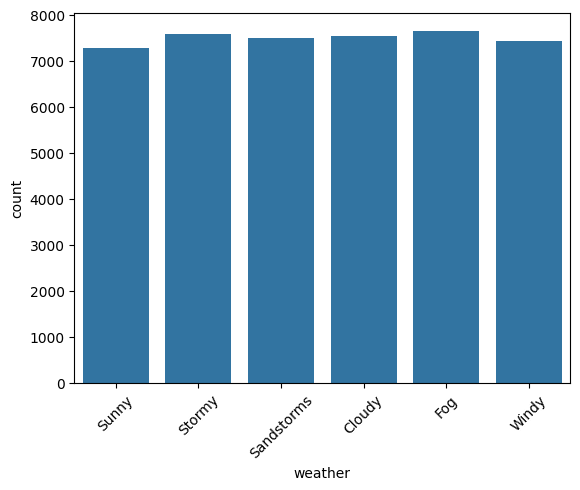

In [82]:
categorical_analysis(df_final,'weather')

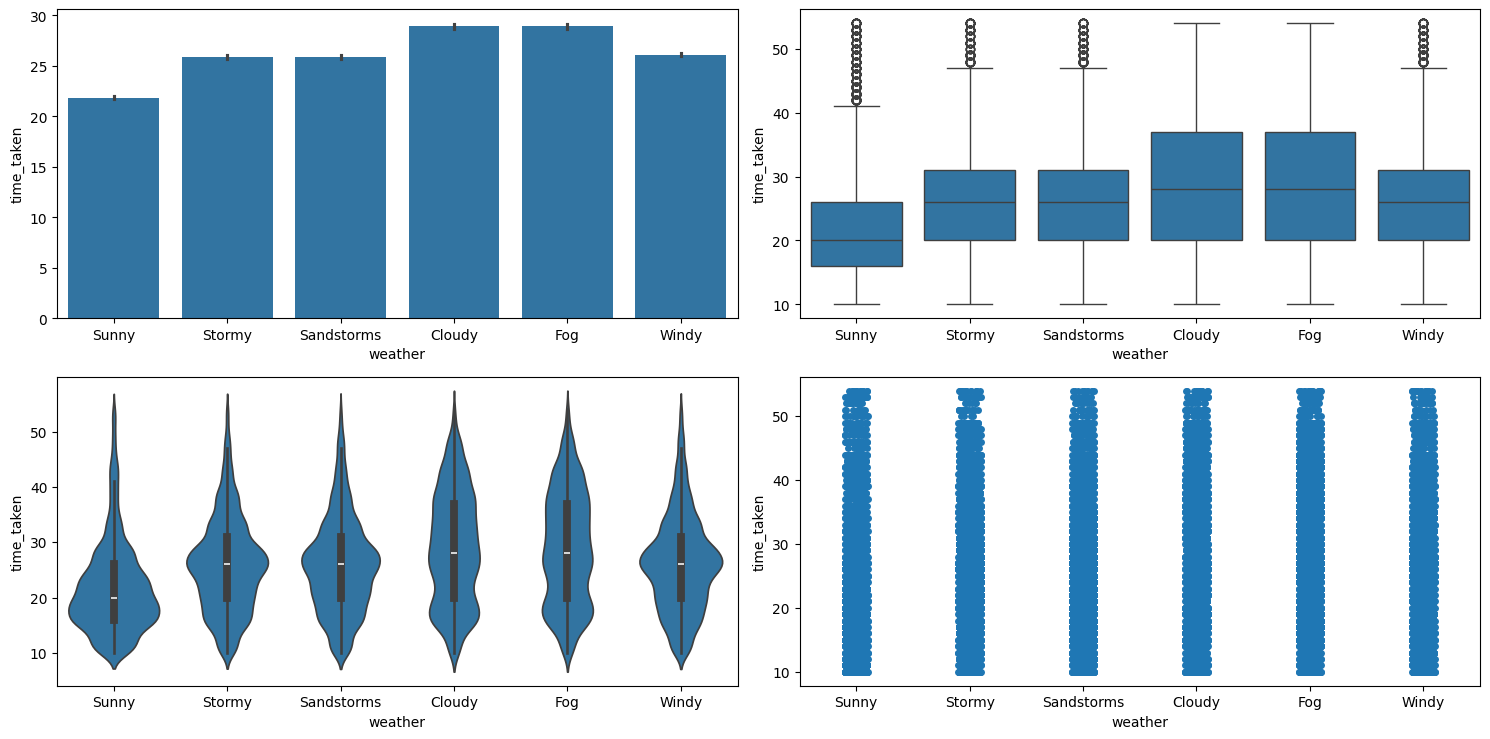

In [83]:
# does weather have an impact
numerical_categorical_analysis(df_final,'weather','time_taken')

In [84]:
anova_test(df_final,'time_taken','weather')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather.


In [85]:
# does weather affect traffic
chi_2_test(df_final,'weather','traffic')

0.4796388074753828
Fail to reject the null hypothesis. There is no significant association between weather and traffic.


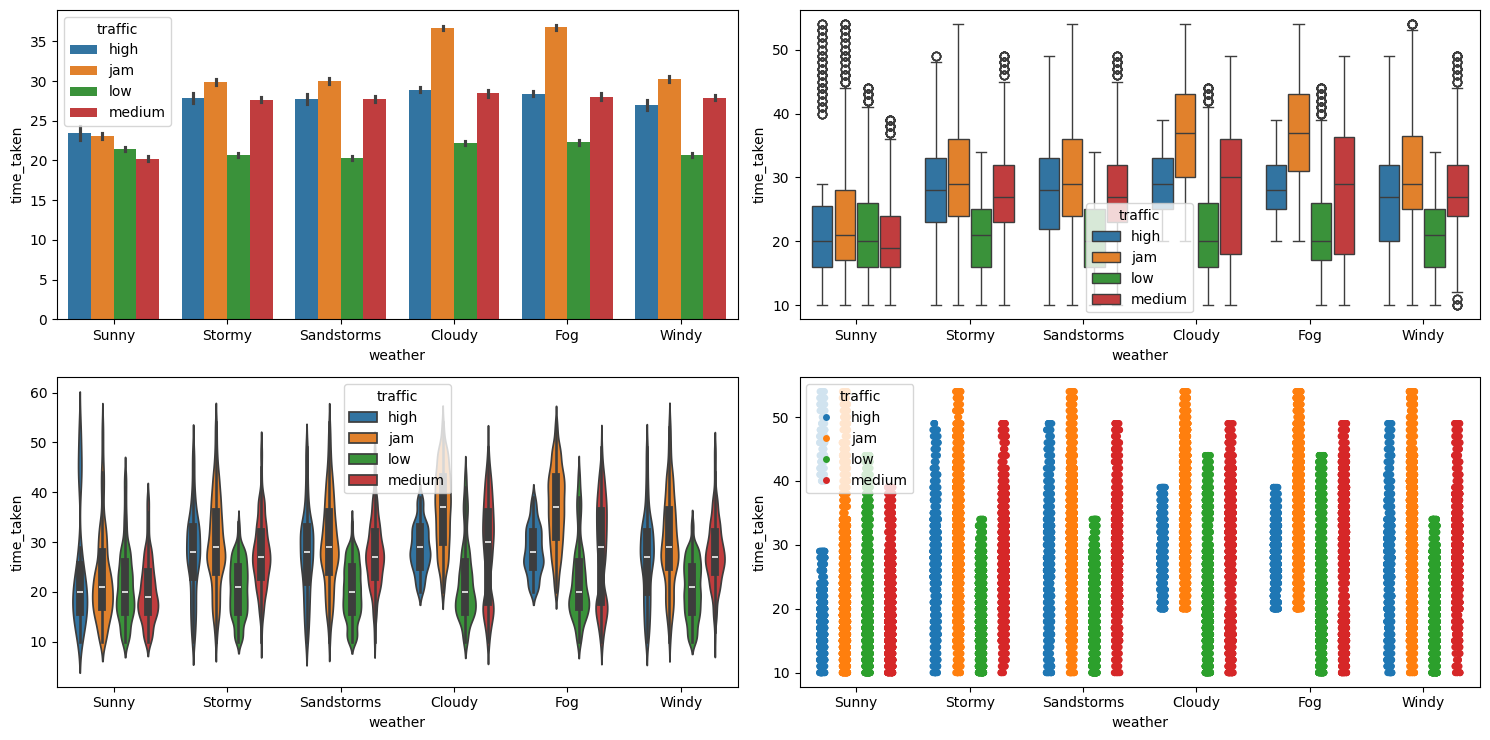

In [86]:
# delivery time based on weather and traffic
multivariate_analysis(df_final,'time_taken','weather','traffic')

In [87]:
df_final.pivot_table(index='weather',columns='traffic',values='time_taken',aggfunc='mean')

traffic,high,jam,low,medium
weather,,,,
Cloudy,28.940860,36.689655,22.208445,28.483134
Fog,28.426546,36.806916,22.303427,28.044816
Sandstorms,27.711840,30.018758,20.297049,27.738522
Stormy,27.845839,29.850194,20.681734,27.680502
Sunny,23.448980,23.082132,21.449293,20.195518
Windy,26.972789,30.219056,20.665862,27.888769


vehicle Type and Condition

,Count,Percentage
vehicle_condition,,
2,15034,33.04%
1,15030,33.03%
0,15009,32.99%
3,429,0.94%


**************************************************
The unique categories in vehicle_condition column are [2, 0, 1, 3]
**************************************************
The number of categories in vehicle_condition coumn are 4


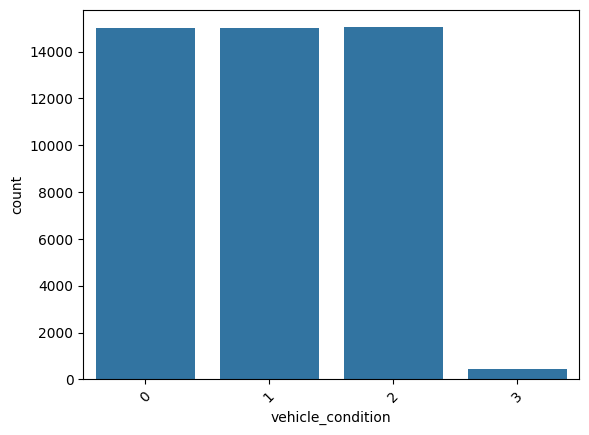

In [88]:
categorical_analysis(df_final,'vehicle_condition')

,Count,Percentage
type_of_vehicle,,
motorcycle,26427,58.08%
scooter,15244,33.5%
electric_scooter,3778,8.3%
bicycle,53,0.12%


**************************************************
The unique categories in type_of_vehicle column are ['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle ']
**************************************************
The number of categories in type_of_vehicle coumn are 4


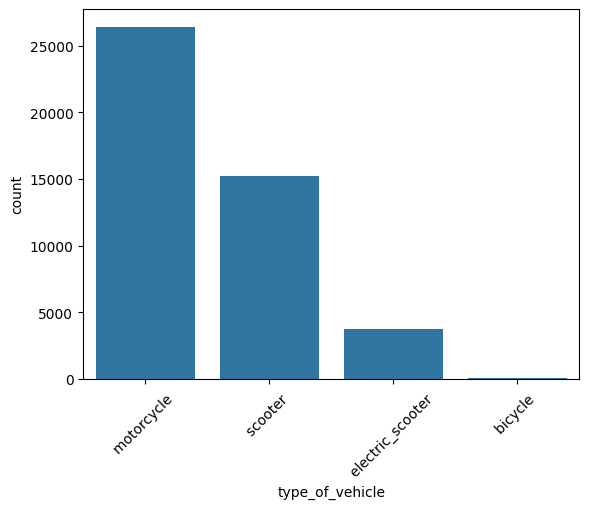

In [89]:
categorical_analysis(df_final,'type_of_vehicle')

,Count,Percentage
type_of_order,,
snack,11512,25.3%
meal,11435,25.13%
drinks,11294,24.82%
buffet,11261,24.75%


**************************************************
The unique categories in type_of_order column are ['snack', 'drinks', 'buffet', 'meal']
**************************************************
The number of categories in type_of_order coumn are 4


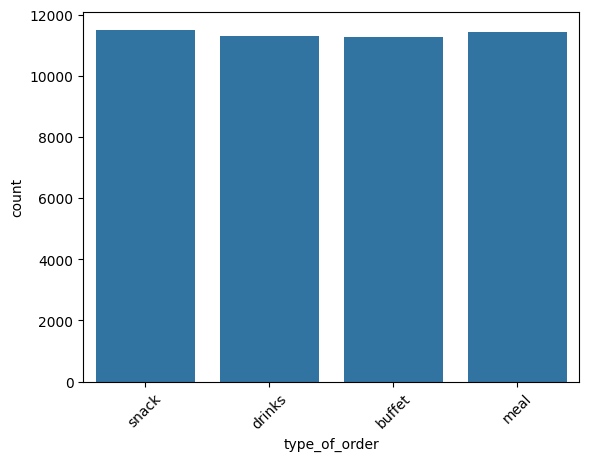

In [90]:
categorical_analysis(df_final,'type_of_order')

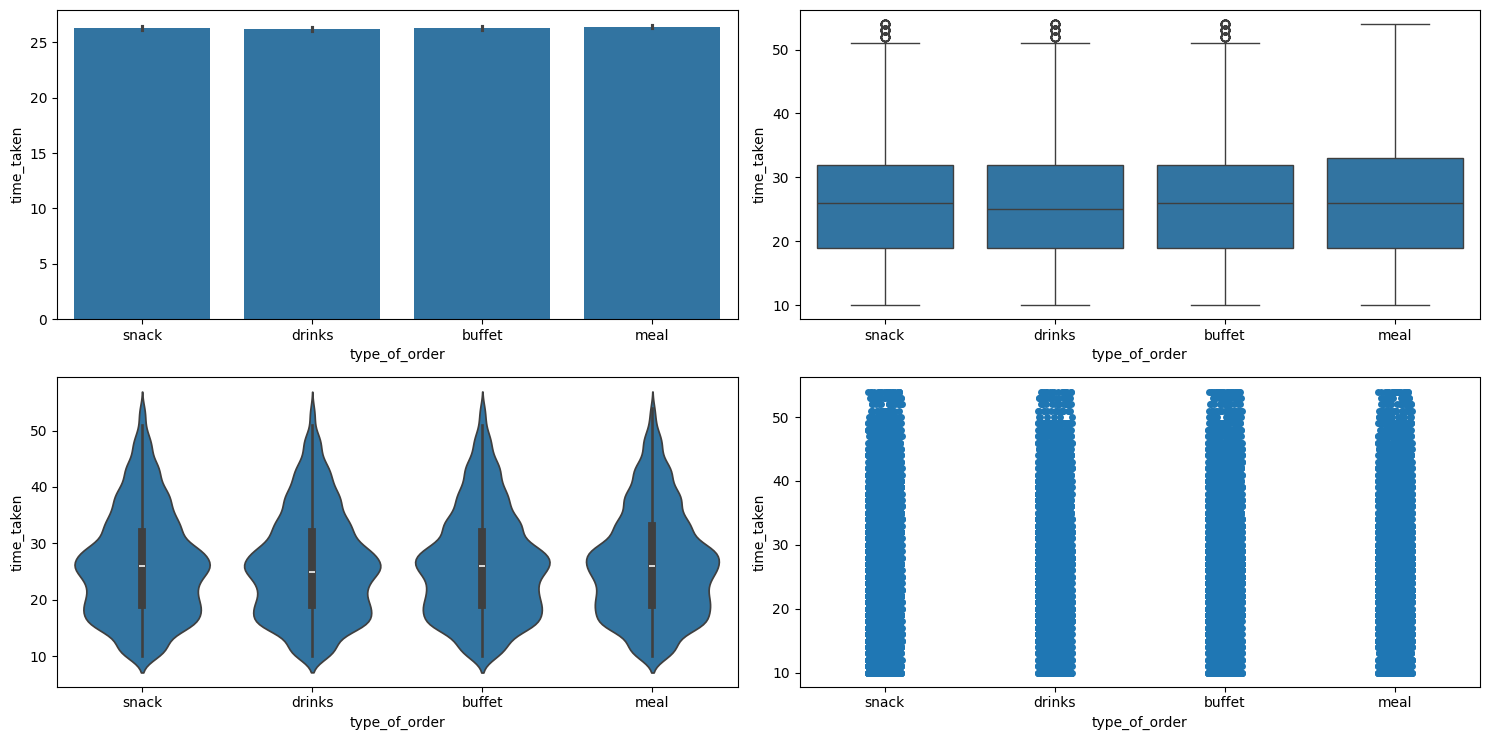

In [91]:
numerical_categorical_analysis(df_final,'type_of_order','time_taken')

In [92]:
anova_test(df_final,'time_taken','type_of_order')

0.3043309877239704
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


In [93]:
pd.crosstab(df_final['type_of_order'],df_final['is_weekend'])

is_weekend,0,1
type_of_order,,
buffet,8238,3023
drinks,8130,3164
meal,8290,3145
snack,8337,3175


In [95]:
chi_2_test(df_final,'pickup_time','type_of_order')

0.49118080317709845
Fail to reject the null hypothesis. There is no significant association between pickup_time and type_of_order.


In [ ]:
# City Name


,Count,Percentage
City_name,,
JAP,3439,7.56%
RANCHI,3222,7.08%
BANG,3184,7.0%
SUR,3182,6.99%
HYD,3177,6.98%
MUM,3168,6.96%
MYS,3164,6.95%
COIMB,3162,6.95%
VAD,3159,6.94%


**************************************************
The unique categories in City_name column are ['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA', 'AURG', 'AGR', 'VAD', 'ALH', 'BHP']
**************************************************
The number of categories in City_name coumn are 22


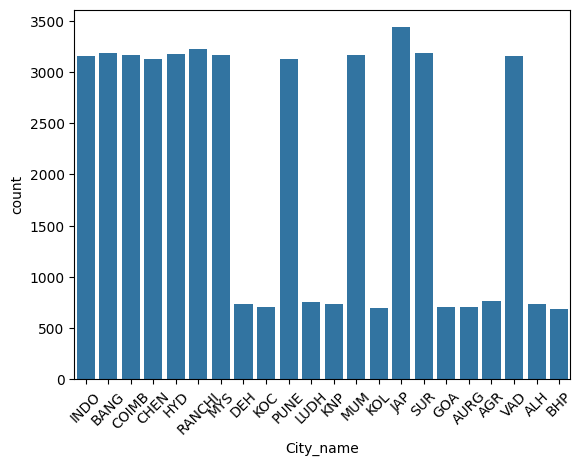

In [97]:
categorical_analysis(df_final,'City_name')

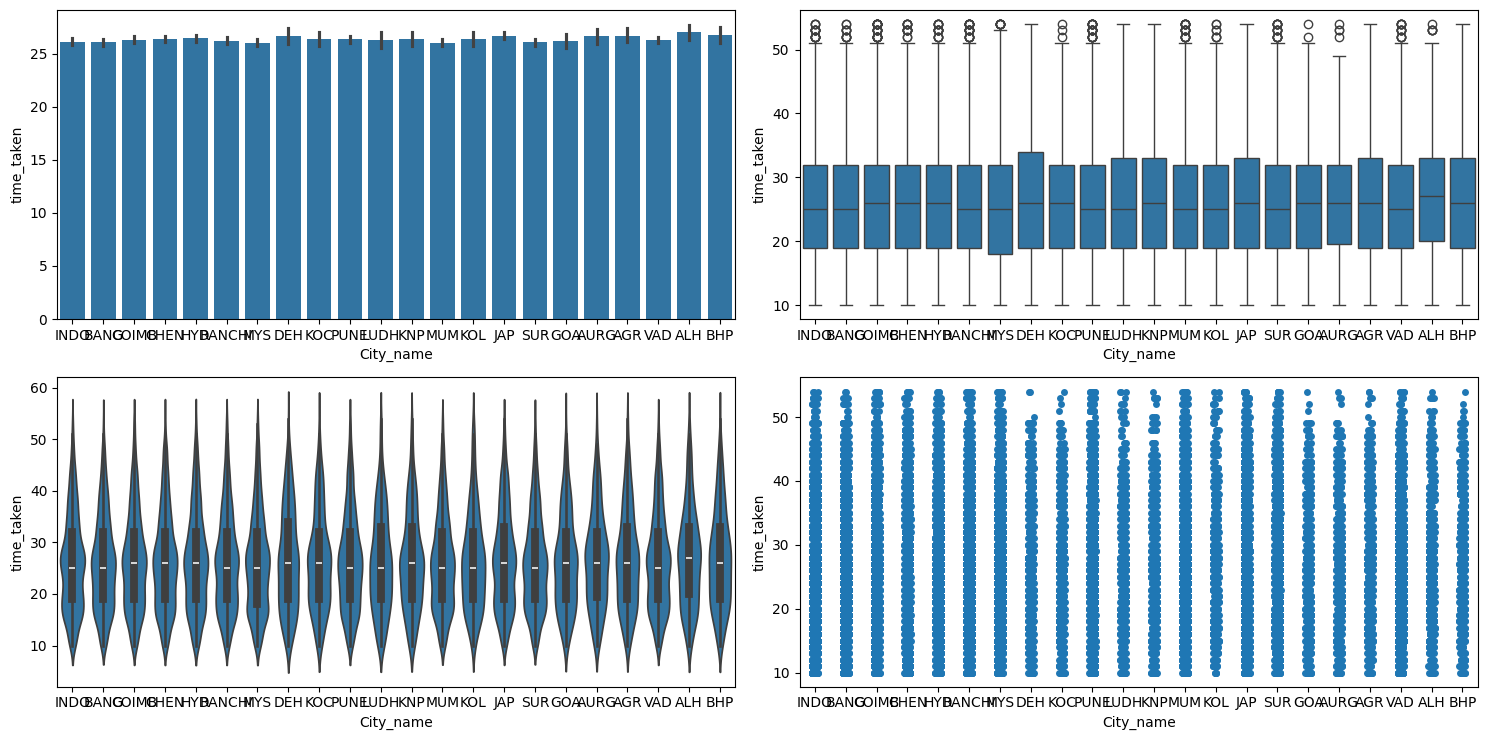

In [98]:
# does a city affects de;livery times
numerical_categorical_analysis(df_final,'City_name','time_taken')

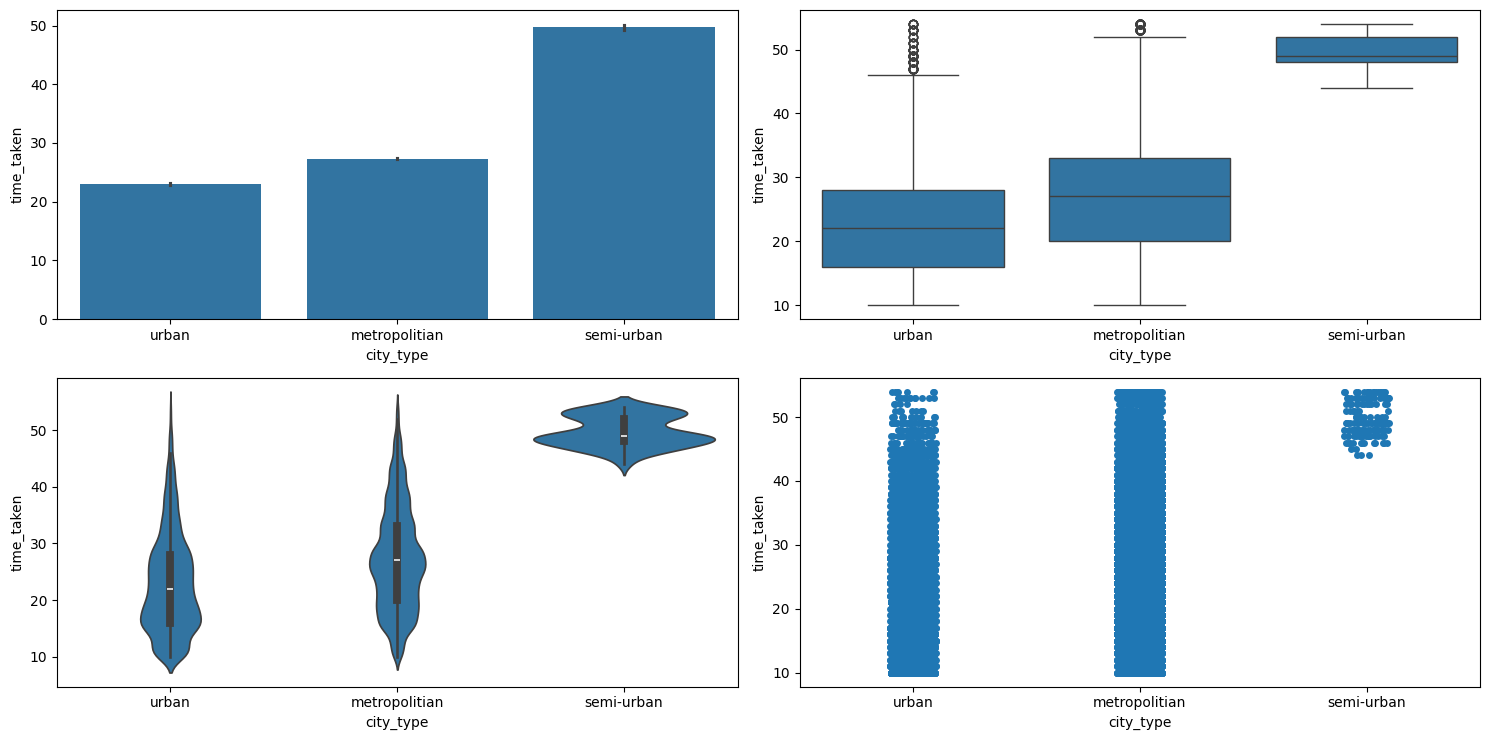

In [99]:
numerical_categorical_analysis(df_final,'city_type','time_taken')

In [100]:
anova_test(df_final,'time_taken','city_type')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city_type.


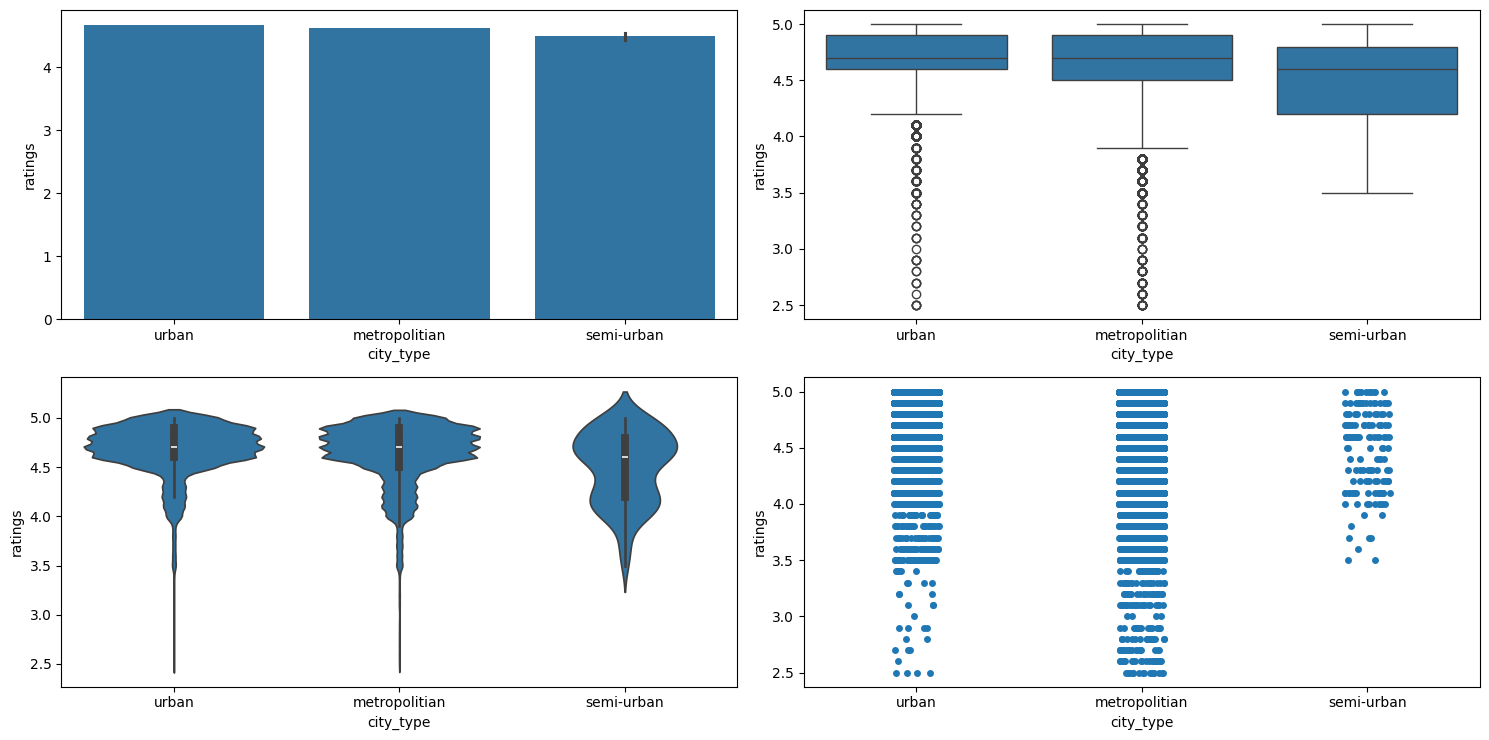

In [101]:
# does city type affects rider ratings
numerical_categorical_analysis(df_final,'city_type','ratings')

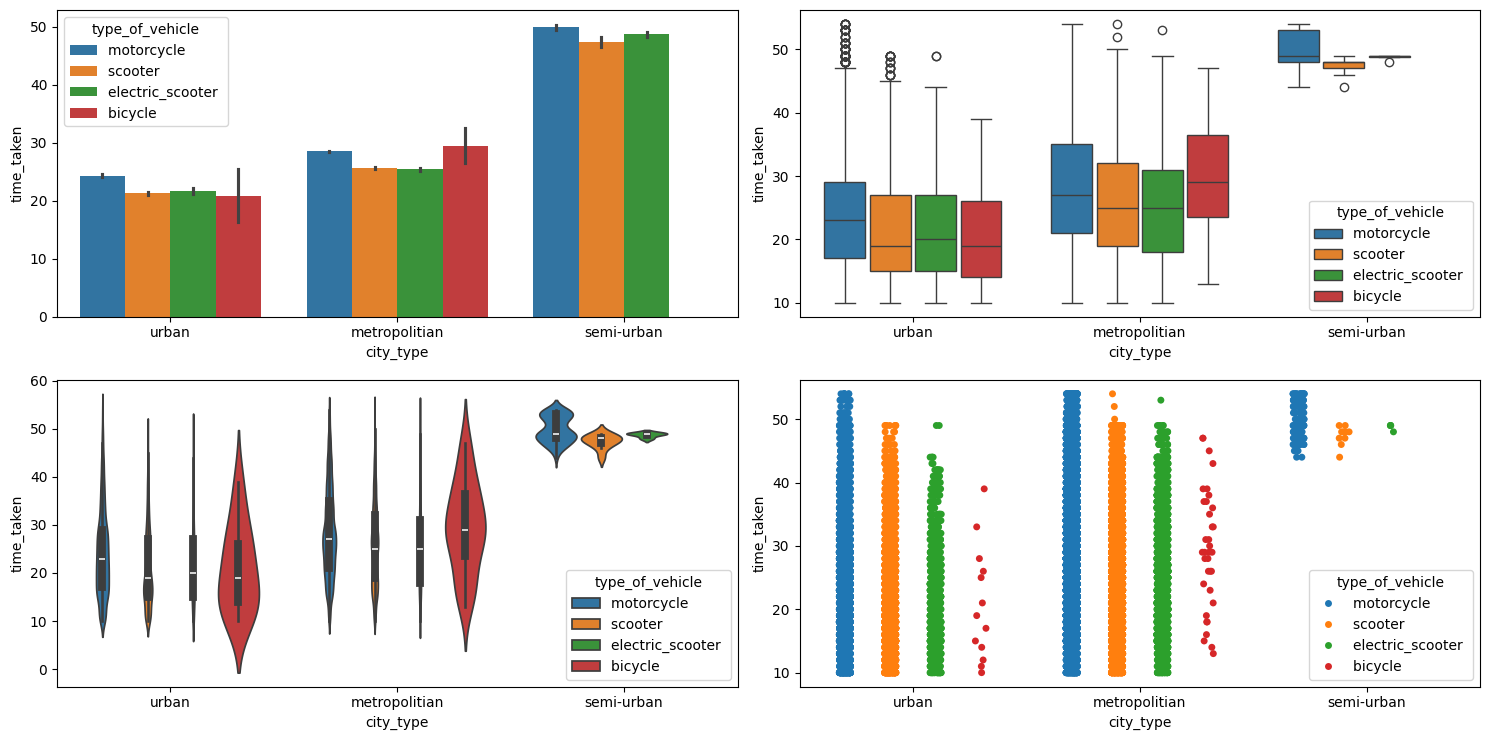

In [102]:
multivariate_analysis(df_final,'time_taken','city_type','type_of_vehicle')

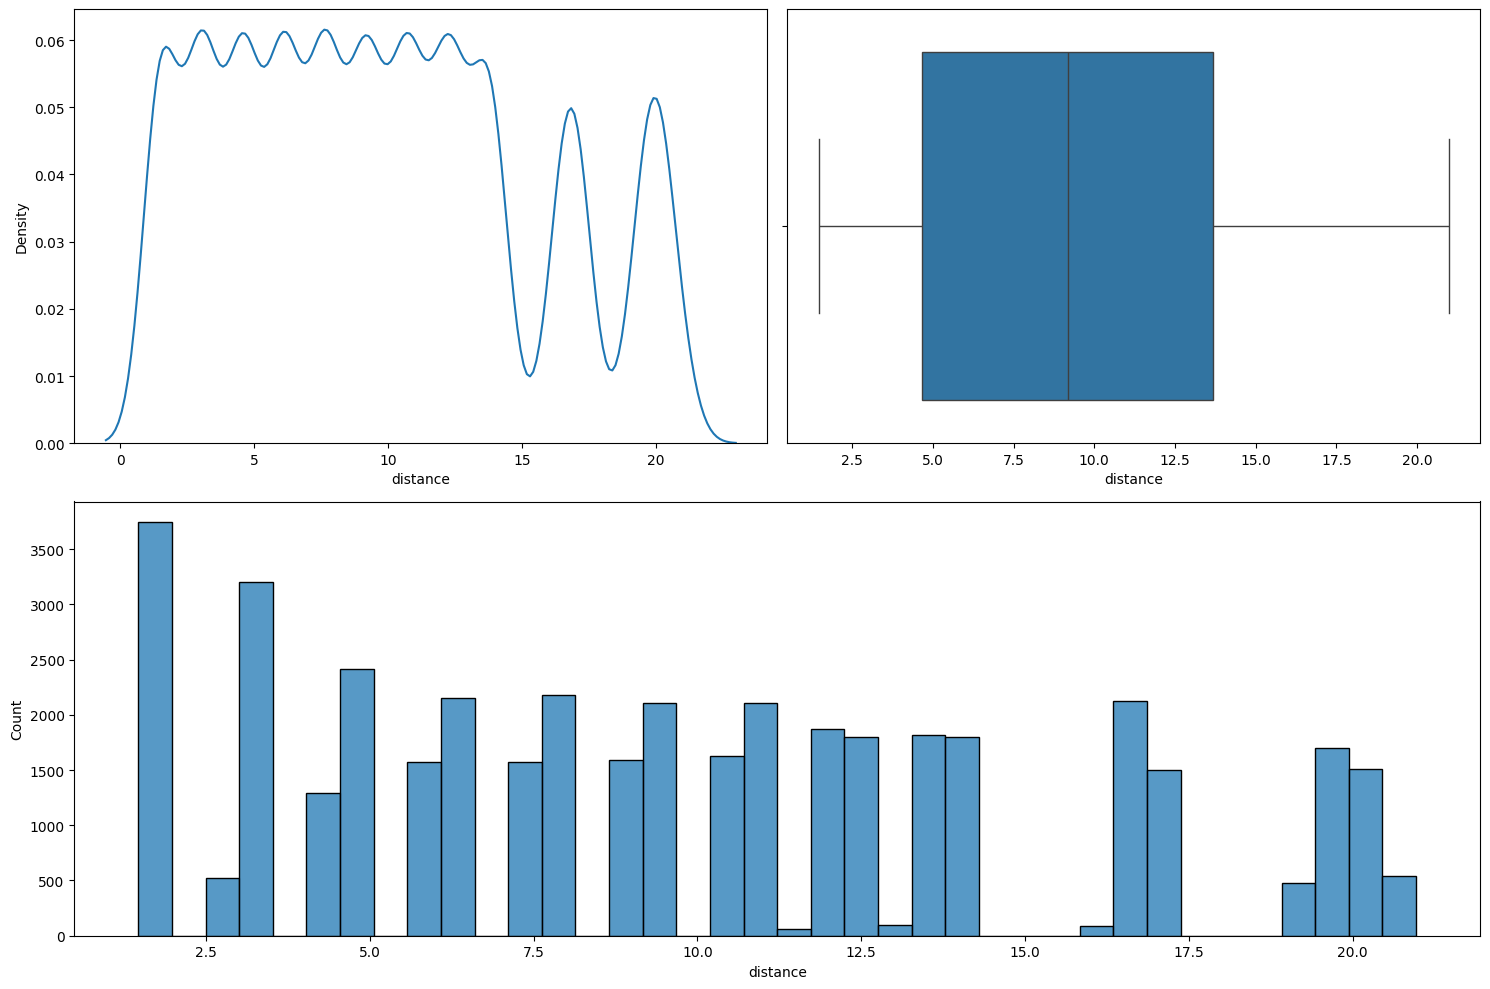

In [103]:
numerical_analysis(df_final,'distance')

<Axes: xlabel='distance', ylabel='time_taken'>

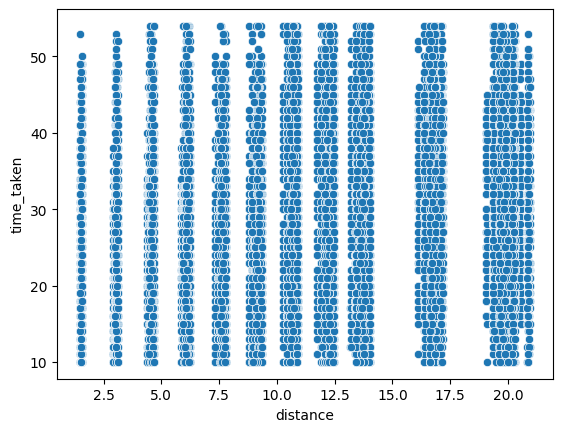

In [104]:
sns.scatterplot(df_final,x='distance',y='time_taken')

In [105]:
df_final[['distance','time_taken']].corr()

,distance,time_taken
distance,1.000000,0.321176
time_taken,0.321176,1.000000
